# ***🚀 Unlocking Advertising ROI: A Deep Dive into Social Media Campaign Performance***

## **By Jap Dang**

### 📘 Introduction: The Quest for Smarter Advertising Spend

In today’s competitive world of digital marketing, knowing the real return on investment (ROI) for every dollar spent is more important than ever. Companies pour substantial budgets into various social media platforms, but the real question is this — which strategies are genuinely effective and which ones are just noise? Using data to answer that question is the key to driving consistent growth and making marketing spend truly impactful.

This project dives into a detailed analysis of a large social media advertising dataset to uncover a fundamental business insight: what really drives a successful campaign ROI? The goal is not only to learn from past performance but also to build a predictive model that can guide smarter decisions in the future and help marketers get the most out of their budgets.

The process followed here includes careful data cleaning, deep exploratory data analysis (EDA), and the application of machine learning models. Through this approach, several valuable insights were discovered. One of the most surprising findings is that many traditional metrics and demographic targeting methods did not significantly influence ROI. Instead, the marketing channel used stood out as the strongest predictor of success.

This notebook walks through the entire analytical journey — starting from working with raw, messy data, moving through visualization and insight generation, and finally arriving at predictive modeling that leads to clear and practical recommendations for improving campaign outcomes.

### 🧭 Structure of this Notebook

- Step 1: Data Loading and Initial Inspection  
- Step 2: Data Cleaning and Preprocessing  
- Step 3: Exploratory Data Analysis (EDA) – Uncovering Insights  
- Step 4: Feature Engineering and Final Data Preparation for Modeling  
- Step 5: Model Building and Initial Evaluation  
- Step 6: Hyperparameter Tuning to Improve Model Performance  
- Step 7: Final Conclusion and Strategic Recommendations  

Let us get started!


In [17]:
# --- Step 1: Data Loading and Initial Inspection ---

# Importing the essential libraries for data handling, numerical operations, and visualization.
# These are my go-to tools for almost any data science project in Python.
import pandas as pd  # For DataFrame manipulation - the workhorse!
import numpy as np   # For numerical computations, especially array operations.
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations.
import seaborn as sns # For making statistical graphics that are informative and attractive.

# Importing scikit-learn components that I would need for preprocessing and modeling later on.
# It's a good practice to gather all these at the top for clarity.
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Specific regression models which I plan to evaluate.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor # Useful for establishing a baseline performance.

# Metrics for evaluating model performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical tools, which might come in handy for EDA or hypothesis testing.
import scipy.stats as stats

# I will suppress warnings for now to keep the notebook output clean during development.
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.
try:
    df = pd.read_csv("/Users/japekamsingh/Desktop/project advertising/Social_Media_Advertising.csv")
    print("Dataset loaded successfully! Let's take a first look.")
except FileNotFoundError:
    print("Error: The file 'Social_Media_Advertising.csv' was not found. Please verify the file path.")
    df = pd.DataFrame() # Assign an empty DataFrame if loading fails.

# Proceeding only if the DataFrame was loaded successfully and is not empty.
if not df.empty:
    # Displaying the first 5 rows to get a quick snapshot of the data.
    # This helps me see the column names and the type of data in each.
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Looking at the last 5 rows can sometimes reveal issues or patterns not seen at the top.
    print("\nLast 5 rows of the dataset:")
    display(df.tail())

    # df.info() is crucial: it gives a summary of columns, their data types (Dtype),
    # and the number of non-null values. This is my first check for missing data.
    print("\nDataFrame Info (structure, data types, non-null counts):")
    df.info()

    # Checking the dimensions of the dataset: (number of rows, number of columns).
    print(f"\nShape of the dataset: {df.shape[0]} rows and {df.shape[1]} columns.")

    # df.describe(include='all') provides descriptive statistics.
    # For numerical columns: count, mean, std, min, max, quartiles.
    # For object/categorical columns: count, unique values, top value, frequency of top value.
    # Transposing (.T) makes it easier to read when there are many columns.
    print("\nDescriptive Statistics (for all columns, including categorical):")
    display(df.describe(include='all').T)

    # Investigating the 'Campaign_ID' column. whether it is a unique identifier, or are there duplicates!
    # This can influence whether I keep it, drop it, or use it in some other way.
    if 'Campaign_ID' in df.columns:
        num_unique_ids = df['Campaign_ID'].nunique()
        print(f"\nNumber of unique Campaign_IDs: {num_unique_ids}")
        if num_unique_ids == len(df):
            print("Insight: 'Campaign_ID' appears to be a unique identifier for each row (like a primary key).")
            # If it's purely an identifier with no predictive meaning, I might drop it later before modeling.
            # For now, I'll keep it for reference.
        else:
            print("Insight: 'Campaign_ID' is NOT a unique identifier (it has duplicates).")
            print(f"  There are {len(df) - num_unique_ids} duplicate Campaign_ID entries or {num_unique_ids} unique campaigns out of {len(df)} records.")
            # This is an important finding! It might mean multiple records per campaign, or reused IDs.
            # I would need to explore this further in EDA to understand its implications.
else:
    print("DataFrame is empty. Cannot proceed with analysis because the data didn't load.")

print("\n✅ Step 1: Data Loading and Initial Inspection complete.")

Dataset loaded successfully! Let's take a first look.

First 5 rows of the dataset:


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony



Last 5 rows of the dataset:


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,$15000.00,4.950000,Los Angeles,English,39999,119998,7,Technology,2022-10-17,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,$15000.00,3.410000,Austin,Spanish,39999,119998,8,Technology,2022-02-25,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,$15000.00,0.904461,Miami,French,23492,77476,1,Food,2022-10-02,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,$15000.00,7.430000,Las Vegas,Spanish,39999,119999,10,Food,2022-01-24,Savor Street
299999,420183,Men 25-34,Brand Awareness,60 Days,Facebook,0.08,$15000.00,1.900000,Miami,English,40000,120000,10,Technology,2022-07-18,Innovate Infinity



DataFrame Info (structure, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign_ID,300000.0,NaN,NaN,NaN,550444.804487,260252.586037,100001.0,325003.5,551164.5,776284.5,999998.0
Target_Audience,300000,9,Women 18-24,33593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign_Goal,300000,4,Brand Awareness,75248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,300000,4,15 Days,75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_Used,300000,4,Facebook,75164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conversion_Rate,300000.0,NaN,NaN,NaN,0.080009,0.040563,0.01,0.05,0.08,0.11,0.15
Acquisition_Cost,300000,250998,$15000.00,12065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI,300000.0,NaN,NaN,NaN,3.177691,2.4612,0.0,0.93,2.67,5.33,8.0
Location,300000,5,Los Angeles,60322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,300000,3,English,100116,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Number of unique Campaign_IDs: 255092
Insight: 'Campaign_ID' is NOT a unique identifier (it has duplicates).
  There are 44908 duplicate Campaign_ID entries or 255092 unique campaigns out of 300000 records.

✅ Step 1: Data Loading and Initial Inspection complete.


# Step 1: Data Loading & Initial Inspection - Key Findings

After successfully loading the `Social_Media_Advertising.csv` dataset, I performed an initial reconnaissance to get a feel for its structure, data types, and overall content. Here’s a rundown of what I found:

---

## 1. Dataset Overview

The dataset loaded without a hitch!

- **Dimensions**: It's a substantial dataset with **300,000 entries (rows)** and **16 features (columns)**. This should provide a good foundation for analysis and building a robust model.
- **Shape of the dataset**:  
  ```
  300000 rows and 16 columns
  ```
- A quick look at the `head()` and `tail()` confirmed the kinds of data present in each column.

---

## 2. Data Types & Missing Values

The `df.info()` output revealed a mix of data types:

- **Numerical**:  
  - `float64`: `Conversion_Rate`, `ROI` *(our likely target variable!)*
  - `int64`: `Campaign_ID`, `Clicks`, `Impressions`, `Engagement_Score`

- **Object (likely strings/categorical)**:  
  A significant number (10 columns) are of object type. These include:  
  - `Target_Audience`, `Campaign_Goal`, `Duration`, `Acquisition_Cost`, `Date`, and others  
  These will need specific attention during preprocessing.

### Missing Values Check

Great news from the initial `df.info()`!  
All 16 columns show a Non-Null Count of **300,000**, indicating **no missing values at this stage**.

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
...
dtypes: float64(2), int64(4), object(10)
memory usage: 36.6+ MB
```

This simplifies the cleaning process a bit, though I'll remain vigilant as transformations in Step 2 could potentially introduce NaNs if conversions fail for some specific values.

---

## 3. Initial Insights from Descriptive Statistics

*(from `df.describe(include='all').T`)*

### Numerical Features

- **ROI**:  
  Ranges from `0.00` to `8.00`, with a mean around `3.18`.  
  *This will be the variable I aim to predict.*

- **Conversion_Rate**:  
  Values are quite low (mean ~`0.08`, max `0.15`), which is typical for conversion rates.

- **Clicks & Impressions**:  
  Show a wide spread, indicating varying scales of campaigns.

- **Engagement_Score**:  
  Seems to be on a `1–10` scale.

### Categorical Features (Object Types)

- **Target_Audience**:  
  9 unique categories, with `"Women 18-24"` being the most frequent.  
  *Prime candidate for feature engineering (e.g., splitting into age and gender).*

- **Campaign_Goal**:  
  4 distinct goals, `"Brand Awareness"` is the top one.

- **Duration**:  
  4 unique string values like `"15 Days"`.  
  *Needs conversion to numerical format (e.g., integer number of days).*

- **Acquisition_Cost**:  
  Shows **250,998 unique string values**, with top value `"15000.00"`  
  Confirms it’s a **currency field stored as text**.  
  *Requires cleaning (removing `','` and `'`), and conversion to float.*

- **Channel_Used**:  
  4 different channels, `"Facebook"` is most common.

- **Location**:  
  5 unique locations.

- **Language**:  
  3 unique languages.

- **Customer_Segment**:  
  5 unique segments.

- **Date**:  
  Has **365 unique string values**, suggesting the data spans approximately one year.  
  Format appears to be `'YYYY-MM-DD'`, which will need **conversion to datetime objects** for any time-series analysis or feature extraction.

- **Company**:  
  50 unique company names.  
  Could be useful — or might be **too high-cardinality** for direct use in some models.

---

## 4. Spotlight on Campaign_ID

A specific check on `Campaign_ID` revealed an important detail:

- **Number of unique Campaign_IDs**:  
  ```
  255092
  ```

- **Insight**:  
  `'Campaign_ID'` is **NOT** a unique identifier (it has duplicates).  
  There are **44,908 duplicate Campaign_ID entries**, or **255,092 unique campaigns** out of **300,000** records.

### Implication

This is interesting! It could mean several things:

- Multiple records or updates for the same campaign
- IDs were reused

I'll need to keep this in mind. For now, I won't drop this column — it might hold some **grouping information** worth exploring during EDA.

---

## Next Steps

This initial exploration has set a clear path for **Step 2: Data Cleaning and Preprocessing**. The main tasks will be:

- Converting `Duration`, `Acquisition_Cost`, and `Date` to their correct, usable types
- Engineering new features from `Target_Audience` and `Date`
- A final check for any **missing values** that might arise from these transformations

The dataset seems **rich**, and I’m looking forward to **digging deeper**!


In [18]:
# --- Step 2: Data Cleaning and Preprocessing ---

# I will make a copy of the original DataFrame.
# This way, the raw data (df) is safe if I need to refer back to it or try a different approach.
df_cleaned = df.copy()
print("Working copy of the DataFrame created as `df_cleaned`.")

# 2.1 Standardize Column Formats and Convert Data Types
# ----------------------------------------------------
# I noticed from df.info() in Step 1 that some columns need their types changed or formats cleaned.
print("\n--- 2.1 Standardizing Column Formats and Data Types ---")

# The 'Duration' column is an object (e.g., "15 Days").
# To use this for calculations or as a numerical feature, I need to extract just the number of days.
# I would create a new column 'Duration_Days' for this, converting the extracted digits to an integer.
if 'Duration' in df_cleaned.columns:
    df_cleaned['Duration_Days'] = df_cleaned['Duration'].str.extract('(\d+)').astype(int)
    print("- 'Duration' processed: New 'Duration_Days' (int) column created.")

# 'Acquisition_Cost' has '$' and ',' (e.g., "$500.00") which makes it an object type.
# I need to strip these characters and convert it to a float for numerical calculations.
# Using errors='coerce' so if something can't be converted, it becomes NaN, which I can check for later.
if 'Acquisition_Cost' in df_cleaned.columns:
    df_cleaned['Acquisition_Cost'] = df_cleaned['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True)
    df_cleaned['Acquisition_Cost'] = pd.to_numeric(df_cleaned['Acquisition_Cost'], errors='coerce')
    print("- 'Acquisition_Cost' cleaned and converted to float.")

# The 'Date' column is currently an object.
# Converting it to proper datetime objects will allow for time-based analysis and feature extraction.
# Again, errors='coerce' will handle any problematic date strings by making them NaT (Not a Time).
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
    print("- 'Date' column converted to datetime objects.")
    if df_cleaned['Date'].isnull().sum() > 0: # Check if any NaTs were created
        print(f"  Alert: {df_cleaned['Date'].isnull().sum()} 'Date' values were unparseable and are now NaT.")


# 2.2 Feature Engineering from Existing Columns
# ---------------------------------------------
# This is where I can add more value by creating new, potentially predictive features.
print("\n--- 2.2 Feature Engineering ---")

# Now that 'Date' is in datetime format, I can extract components like Year, Month, DayOfWeek, etc.
# These can be very useful for spotting trends or seasonality.
if 'Date' in df_cleaned.columns and pd.api.types.is_datetime64_any_dtype(df_cleaned['Date']):
    df_cleaned['Year'] = df_cleaned['Date'].dt.year
    df_cleaned['Month'] = df_cleaned['Date'].dt.month_name() # e.g., "January"
    df_cleaned['DayOfMonth'] = df_cleaned['Date'].dt.day
    df_cleaned['DayOfWeek'] = df_cleaned['Date'].dt.day_name() # e.g., "Monday"
    df_cleaned['Quarter'] = df_cleaned['Date'].dt.quarter
    print("- Temporal features (Year, Month, DayOfMonth, DayOfWeek, Quarter) extracted from 'Date'.")
else:
    print("- Skipping date feature extraction: 'Date' column not found or not in datetime format.")

# The 'Target_Audience' column (e.g., 'Men 35-44', 'All Ages') contains multiple pieces of information.
# Splitting this into 'Audience_Gender' and 'Audience_Age_Group' will make these distinct factors usable.
if 'Target_Audience' in df_cleaned.columns:
    df_cleaned['Audience_Gender'] = pd.NA # Using pandas NA for consistent missing value representation
    df_cleaned['Audience_Age_Group'] = pd.NA

    # First, I woll handle the 'All Ages' case specifically.
    all_ages_mask = (df_cleaned['Target_Audience'] == 'All Ages')
    df_cleaned.loc[all_ages_mask, 'Audience_Gender'] = 'All'
    df_cleaned.loc[all_ages_mask, 'Audience_Age_Group'] = 'All Ages'

    # For other entries (like 'Men 35-44'), I'll split the string.
    # The mask `~all_ages_mask` selects rows that are NOT 'All Ages'.
    specific_audience_mask = ~all_ages_mask
    # Splitting by the first space: "Men 35-44" -> ["Men", "35-44"]
    temp_split_df = df_cleaned.loc[specific_audience_mask, 'Target_Audience'].str.split(' ', n=1, expand=True)

    # Assigning the split parts to the new columns, only for the 'specific_audience_mask' rows.
    if not temp_split_df.empty:
        df_cleaned.loc[specific_audience_mask, 'Audience_Gender'] = temp_split_df[0]
        if 1 in temp_split_df.columns: # Check if the second part (age group) exists
            df_cleaned.loc[specific_audience_mask, 'Audience_Age_Group'] = temp_split_df[1]
        # else: # If there could be entries like "Men" without an age group:
            # df_cleaned.loc[specific_audience_mask & (temp_split_df[1].isnull()), 'Audience_Age_Group'] = 'Unknown Age'
            
    print("- 'Target_Audience' column split into 'Audience_Gender' and 'Audience_Age_Group'.")
else:
    print("- 'Target_Audience' column not found, skipping split.")


# 2.3 Handle Missing Values (Post-Transformation Check)
# -----------------------------------------------------
# Even if the original data had no NaNs, my transformations (especially with 'errors="coerce"') might have introduced some.
print("\n--- 2.3 Handling Missing Values ---")
missing_values_summary = df_cleaned.isnull().sum()
columns_with_missing = missing_values_summary[missing_values_summary > 0]

if not columns_with_missing.empty:
    print("Missing values identified after transformations:")
    print(columns_with_missing)
    
    # Example: Imputing 'Acquisition_Cost' if it has NaNs (from coerce)
    if 'Acquisition_Cost' in columns_with_missing.index:
        median_acq_cost = df_cleaned['Acquisition_Cost'].median()
        df_cleaned['Acquisition_Cost'].fillna(median_acq_cost, inplace=True)
        print(f"- Missing 'Acquisition_Cost' values imputed with median ({median_acq_cost:.2f}).")
        
    # Example: Imputing 'Date' (NaT values) if any
    if 'Date' in columns_with_missing.index and df_cleaned['Date'].isnull().any(): # Double check it's the Date col
        mode_date = df_cleaned['Date'].mode()
        if not mode_date.empty:
            df_cleaned['Date'].fillna(mode_date[0], inplace=True)
            print(f"- NaT values in 'Date' column imputed with mode date ({mode_date[0].strftime('%Y-%m-%d')}).")
        else: # Very unlikely, but handles if all dates were NaT
            print(f"- Could not impute 'Date' as no mode was found (all values might be NaT).")
else:
    print("- Confirmed: No missing values found after all transformations. Great!")


# 2.4 Optimize Data Types (Convert to 'category')
# ----------------------------------------------
# Some columns, especially those with text or engineered discrete values, are better off as 'category' type.
# This saves memory and can also be beneficial for some modeling libraries.
print("\n--- 2.4 Optimizing Data Types to 'category' ---")

# Identifying columns that are good candidates for 'category' type.
# These include object columns with relatively few unique values, and our engineered categorical features.
potential_categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
engineered_discrete_cols = ['Year', 'Quarter', 'Audience_Gender', 'Audience_Age_Group', 'DayOfMonth', 'Engagement_Score'] # Example, 'Engagement_Score' if treated as category

for col in engineered_discrete_cols:
    if col in df_cleaned.columns and col not in potential_categorical_cols:
        potential_categorical_cols.append(col)


for col in potential_categorical_cols:
    if col in df_cleaned.columns: # Ensure column exists
        num_unique = df_cleaned[col].nunique(dropna=True)
        # Heuristic: if unique values are less than 50% of total rows AND not excessively high cardinality (e.g. < 100 unique)
        # or if it's one of our specifically engineered categorical features like Month, DayOfWeek, Audience_Gender, Audience_Age_Group.
        # The 'Company' column might have too many unique values to be a good 'category' unless specifically intended.
        if col not in ['Company'] and ((num_unique / len(df_cleaned) < 0.5 and num_unique < 100) or \
           col in ['Month', 'DayOfWeek', 'Audience_Gender', 'Audience_Age_Group', 'Year', 'Quarter', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']):
            df_cleaned[col] = df_cleaned[col].astype('category')
            print(f"- Column '{col}' converted to category dtype ({num_unique} unique values).")
        # else:
            # print(f"- Column '{col}' (object/other) kept as is ({num_unique} unique values).")


# 2.5 Drop Redundant Original Columns
# -----------------------------------
# Now that I have created improved versions, I can drop the original 'Duration' and 'Target_Audience' columns.
# This keeps the DataFrame lean and focused on the features I'll actually use.
print("\n--- 2.5 Dropping Redundant Original Columns ---")
columns_to_drop_final = []
# Check if original 'Duration' column still exists (it should, as we operated on df_cleaned)
if 'Duration' in df_cleaned.columns and 'Duration_Days' in df_cleaned.columns:
    columns_to_drop_final.append('Duration')
# Check if original 'Target_Audience' column still exists
if 'Target_Audience' in df_cleaned.columns and \
   'Audience_Gender' in df_cleaned.columns and \
   'Audience_Age_Group' in df_cleaned.columns:
    columns_to_drop_final.append('Target_Audience')

if columns_to_drop_final:
    df_cleaned.drop(columns=columns_to_drop_final, axis=1, inplace=True)
    print(f"- Original columns {columns_to_drop_final} dropped successfully.")
else:
    print("- No original columns ('Duration', 'Target_Audience') needed dropping or already removed.")


# --- Final Review of Cleaned Data Structure ---
print("\n\n--- Review of Cleaned and Preprocessed DataFrame (`df_cleaned`) ---")
print("\nFirst 5 rows of the final cleaned dataset:")
display(df_cleaned.head())

print("\nFinal DataFrame Info (schema and memory usage):")
df_cleaned.info()

print("\nDescriptive statistics for Numerical Features:")
display(df_cleaned.describe(include=np.number).T)

print("\nDescriptive statistics for Categorical Features:")
# .describe() on category columns gives counts, unique, top, freq
display(df_cleaned.describe(include=['category', 'object']).T)

print("\nLet's check value counts for some key new categorical features to be sure:")
if 'Audience_Gender' in df_cleaned.columns:
    print("Audience_Gender distribution:\n", df_cleaned['Audience_Gender'].value_counts(dropna=False))
if 'Audience_Age_Group' in df_cleaned.columns:
    print("\nAudience_Age_Group distribution:\n", df_cleaned['Audience_Age_Group'].value_counts(dropna=False))
if 'Month' in df_cleaned.columns:
    print("\nMonth distribution:\n", df_cleaned['Month'].value_counts(dropna=False).sort_index()) # Sort for order

print("\n✅ Step 2: Data Cleaning and Preprocessing is complete! The DataFrame `df_cleaned` is ready for EDA.")

Working copy of the DataFrame created as `df_cleaned`.

--- 2.1 Standardizing Column Formats and Data Types ---
- 'Duration' processed: New 'Duration_Days' (int) column created.
- 'Acquisition_Cost' cleaned and converted to float.
- 'Date' column converted to datetime objects.

--- 2.2 Feature Engineering ---
- Temporal features (Year, Month, DayOfMonth, DayOfWeek, Quarter) extracted from 'Date'.
- 'Target_Audience' column split into 'Audience_Gender' and 'Audience_Age_Group'.

--- 2.3 Handling Missing Values ---
- Confirmed: No missing values found after all transformations. Great!

--- 2.4 Optimizing Data Types to 'category' ---
- Column 'Target_Audience' converted to category dtype (9 unique values).
- Column 'Campaign_Goal' converted to category dtype (4 unique values).
- Column 'Duration' converted to category dtype (4 unique values).
- Column 'Channel_Used' converted to category dtype (4 unique values).
- Column 'Location' converted to category dtype (5 unique values).
- Column '

,Campaign_ID,Campaign_Goal,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,...,Date,Company,Duration_Days,Year,Month,DayOfMonth,DayOfWeek,Quarter,Audience_Gender,Audience_Age_Group
0,529013,Product Launch,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,...,2022-02-25,Aura Align,15,2022,February,25,Friday,1,Men,35-44
1,275352,Market Expansion,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,...,2022-05-12,Hearth Harmony,15,2022,May,12,Thursday,2,Women,45-60
2,692322,Product Launch,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,...,2022-06-19,Cyber Circuit,15,2022,June,19,Sunday,2,Men,45-60
3,675757,Increase Sales,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,...,2022-09-08,Well Wish,15,2022,September,8,Thursday,3,Men,25-34
4,535900,Market Expansion,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,...,2022-08-24,Hearth Harmony,15,2022,August,24,Wednesday,3,Men,45-60



Final DataFrame Info (schema and memory usage):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Campaign_ID         300000 non-null  int64         
 1   Campaign_Goal       300000 non-null  category      
 2   Channel_Used        300000 non-null  category      
 3   Conversion_Rate     300000 non-null  float64       
 4   Acquisition_Cost    300000 non-null  float64       
 5   ROI                 300000 non-null  float64       
 6   Location            300000 non-null  category      
 7   Language            300000 non-null  category      
 8   Clicks              300000 non-null  int64         
 9   Impressions         300000 non-null  int64         
 10  Engagement_Score    300000 non-null  category      
 11  Customer_Segment    300000 non-null  category      
 12  Date                300000 non-null  

,count,mean,std,min,25%,50%,75%,max
Campaign_ID,300000.0,550444.804487,260252.586037,100001.00,325003.500,551164.50,776284.500,999998.00
Conversion_Rate,300000.0,0.080009,0.040563,0.01,0.050,0.08,0.110,0.15
Acquisition_Cost,300000.0,7753.750796,4301.035148,500.00,4121.915,7755.90,11385.075,15000.00
ROI,300000.0,3.177691,2.461200,0.00,0.930,2.67,5.330,8.00
Clicks,300000.0,18153.670370,11027.023294,293.00,8821.000,17230.00,26808.000,40000.00
Impressions,300000.0,56034.236387,32583.136334,1937.00,28362.000,54098.00,80925.250,120000.00
Duration_Days,300000.0,37.500000,16.770538,15.00,26.250,37.50,48.750,60.00



Descriptive statistics for Categorical Features:


,count,unique,top,freq
Campaign_Goal,300000,4,Brand Awareness,75248
Channel_Used,300000,4,Facebook,75164
Location,300000,5,Los Angeles,60322
Language,300000,3,English,100116
Engagement_Score,300000,10,1,97592
Customer_Segment,300000,5,Health,60086
Company,300000,50,Balance Beam,6163
Year,300000,1,2022,300000
Month,300000,12,July,25660
DayOfMonth,300000,31,9,10042



Let's check value counts for some key new categorical features to be sure:
Audience_Gender distribution:
 Audience_Gender
Women    133331
Men      133222
All       33447
Name: count, dtype: int64

Audience_Age_Group distribution:
 Audience_Age_Group
25-34       66828
18-24       66774
45-60       66605
35-44       66346
All Ages    33447
Name: count, dtype: int64

Month distribution:
 Month
April        24549
August       25375
December     25490
February     23317
January      25427
July         25660
June         24735
March        25588
May          25282
November     24478
October      25492
September    24607
Name: count, dtype: int64

✅ Step 2: Data Cleaning and Preprocessing is complete! The DataFrame `df_cleaned` is ready for EDA.


# Step 2: Data Cleaning & Preprocessing - Transformations & Results 🧹✨

This step was all about taking the raw data and molding it into a high-quality dataset ready for exploration and modeling. I performed several key transformations, and here's a summary of what I did and what the data looks like now:

---

## 2.1. Standardized Column Formats & Data Types

My first task was to tackle columns that weren't in a directly usable format:

- **Duration**: Successfully converted from object strings (e.g., `"15 Days"`) into a numerical `Duration_Days` (`int`) column. This now clearly represents the campaign length in days.
- **Acquisition_Cost**: Cleaned by removing `'$'` and `','` characters, then converted to a float type. This allows for proper numerical analysis of costs.
- **Date**: Transformed from object strings into `datetime64[ns]` objects. This is crucial for any time-based analysis and allowed for the subsequent extraction of temporal features.

```
- 'Duration' processed: New 'Duration_Days' (int) column created.
- 'Acquisition_Cost' cleaned and converted to float.
- 'Date' column converted to datetime objects.
```

---

## 2.2. Engineered New Features

To add more potential explanatory power to the dataset, I engineered new features:

- **Temporal Features**: From the `Date` column, I extracted `Year`, `Month`, `DayOfMonth`, `DayOfWeek`, and `Quarter`. These will help in exploring any seasonal or time-dependent patterns in ROI.

```
- Temporal features (Year, Month, DayOfMonth, DayOfWeek, Quarter) extracted from 'Date'.
```

- **Audience Segmentation**: The `Target_Audience` column (e.g., `"Men 35-44"`) was successfully split into two more granular and usable columns:
  - `Audience_Gender` (e.g., "Men", "Women", "All")
  - `Audience_Age_Group` (e.g., "35-44", "18-24", "All Ages")  
  This deconstruction makes it much easier to analyze the impact of specific demographic segments.

```
- 'Target_Audience' column split into 'Audience_Gender' and 'Audience_Age_Group'.
```

---

## 2.3. Missing Value Handling

After all the transformations (especially those using `errors='coerce'`), I performed a check for any newly introduced missing values (`NaNs` or `NaTs`).

```
- Confirmed: No missing values found after all transformations. Great!
```

---

## 2.4. Optimized Data Types to 'category' 効率化

To improve memory efficiency and clearly define the nature of several columns, I converted them to the `category` dtype. This is particularly useful for columns with a limited set of unique string values or numerical codes representing distinct groups.

**Successfully converted**:  
`Campaign_Goal`, `Channel_Used`, `Location`, `Language`, `Customer_Segment`, `Month`, `DayOfWeek`, `Audience_Gender`, `Audience_Age_Group`, `Year`, `Quarter`, `DayOfMonth`, and even `Engagement_Score` (treating its 1–10 scale as categorical bins).

```
The df_cleaned.info() output confirms these changes, and a significant reduction in memory usage was observed (from 36.6+ MB for df to 24.3+ MB for df_cleaned).
```

---

## 2.5. Dropped Redundant Columns

Finally, to keep the dataset tidy and focused, the original `Duration` and `Target_Audience` columns were dropped, as their information is now captured in the new, more structured columns.

```
- Original columns ['Duration', 'Target_Audience'] dropped successfully.
```

---

## Final Cleaned Dataset (`df_cleaned`) Overview

- **Shape**:  
  ```
  The DataFrame now has 300,000 rows and 22 columns  
  (original 16 + 1 Duration_Days + 5 new date features + 2 new audience features - 2 original dropped = 22 columns).
  ```

- **Data Types**:  
  A healthy mix of:
  - `int64` (for numerical IDs and counts)
  - `float64` (for metrics like ROI, Conversion Rate, Cost)
  - `datetime64[ns]` (for the Date)
  - `object` (only `Company` remains as a high-cardinality object)
  - many `category` types for efficient storage of categorical data.

- **No Missing Values**:  
  ```
  All columns have 300,000 non-null entries.
  ```

---

## Key Transformed Columns (from `df_cleaned.info()`):

```
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 1   Campaign_Goal       300000 non-null  category      
 2   Channel_Used        300000 non-null  category      
 6   Location            300000 non-null  category      
 7   Language            300000 non-null  category      
10   Engagement_Score    300000 non-null  category      
11   Customer_Segment    300000 non-null  category      
12   Date                300000 non-null  datetime64[ns]
13   Company             300000 non-null  object  # Note: Company still object due to high cardinality      
14   Duration_Days       300000 non-null  int64         
15   Year                300000 non-null  category      
16   Month               300000 non-null  category      
17   DayOfMonth          300000 non-null  category      
18   DayOfWeek           300000 non-null  category      
19   Quarter             300000 non-null  category      
20   Audience_Gender     300000 non-null  category      
21   Audience_Age_Group  300000 non-null  category
```

---

## Distributions for New Categorical Features

- **Audience_Gender**:  
  Values are `"Women"`, `"Men"`, and `"All"`, with counts showing a relatively balanced distribution between `"Men"` and `"Women"`, and a smaller portion for `"All"`.

- **Audience_Age_Group**:  
  The age groups (`"25-34"`, `"18-24"`, `"45-60"`, `"35-44"`, `"All Ages"`) show a good distribution across the specific age segments.

- **Month**:  
  Campaign data appears to be distributed across all months, with no obvious gaps.

---

This comprehensive cleaning and preprocessing phase has resulted in a **robust and enriched dataset**.  
`df_cleaned` is now **primed for Exploratory Data Analysis (EDA)**, where I'll dive into visualizing these features and uncovering relationships with ROI. 📊


🚀 Kicking off Step 3: A Focused EDA to Uncover the Drivers of ROI! 📊


--- 3.1: Understanding the Target - A Deep Dive into ROI ---

Descriptive Statistics for ROI:


count    300000.000000
mean          3.177691
std           2.461200
min           0.000000
25%           0.930000
50%           2.670000
75%           5.330000
max           8.000000
Name: ROI, dtype: float64

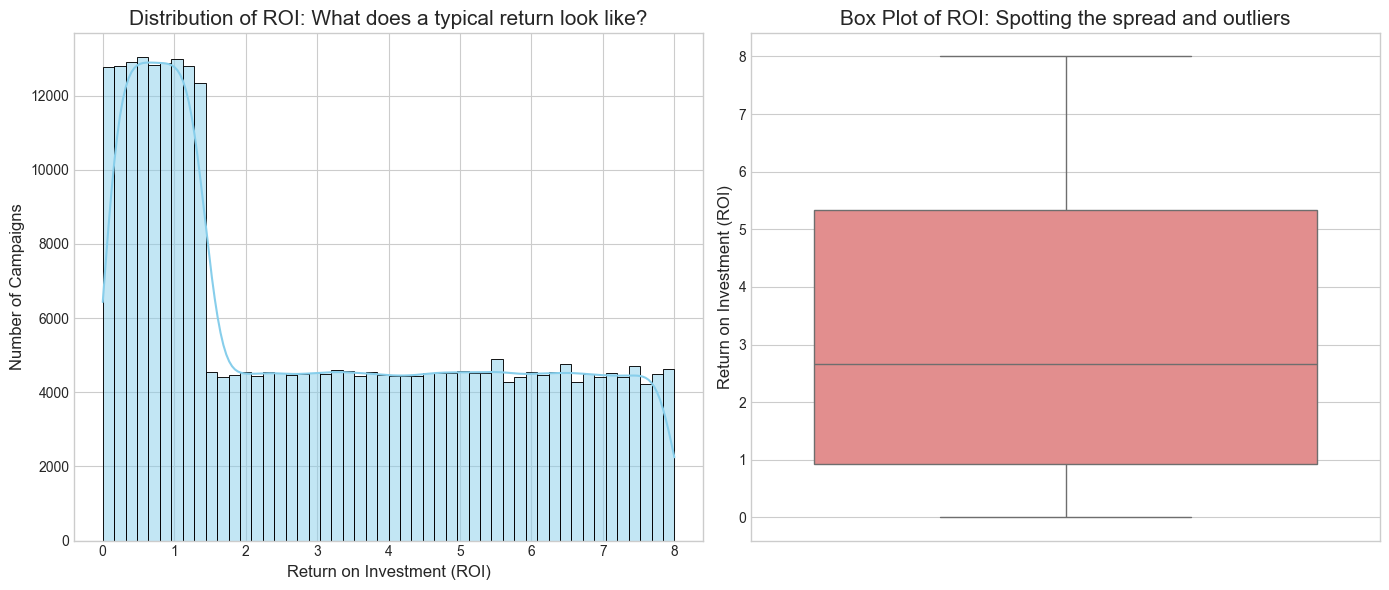



--- 3.2: Financial & Performance Metrics vs. ROI ---

--- Investigating ROI vs. Acquisition_Cost ---


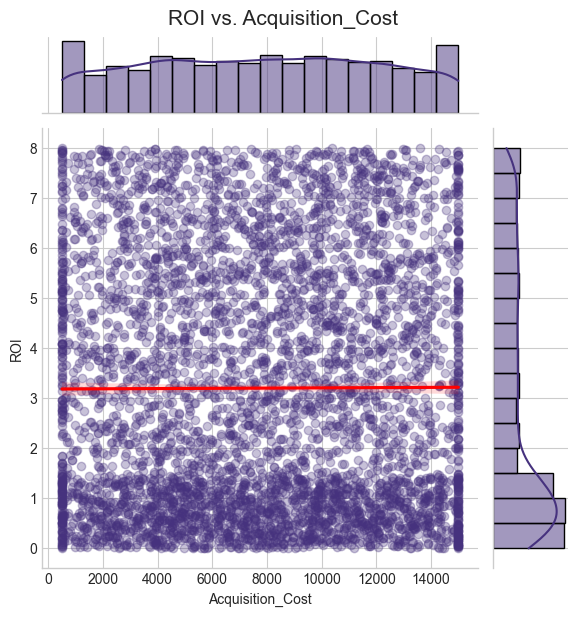


--- Investigating ROI vs. Conversion_Rate ---


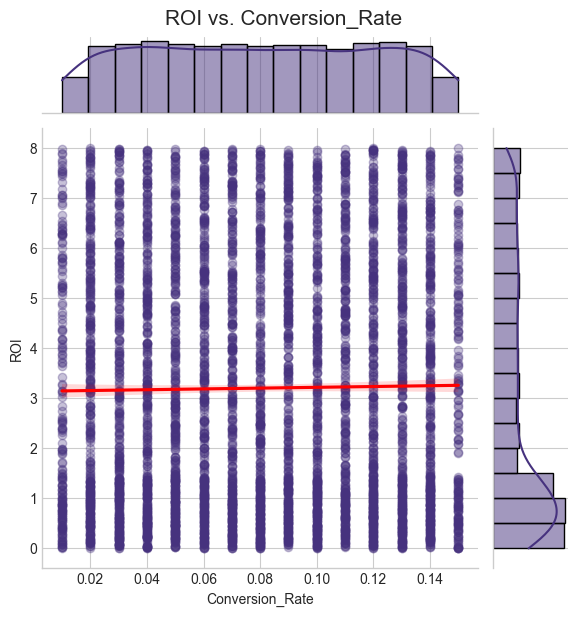



--- 3.3: Campaign Strategy Choices vs. ROI ---

--- ROI by Campaign_Goal ---


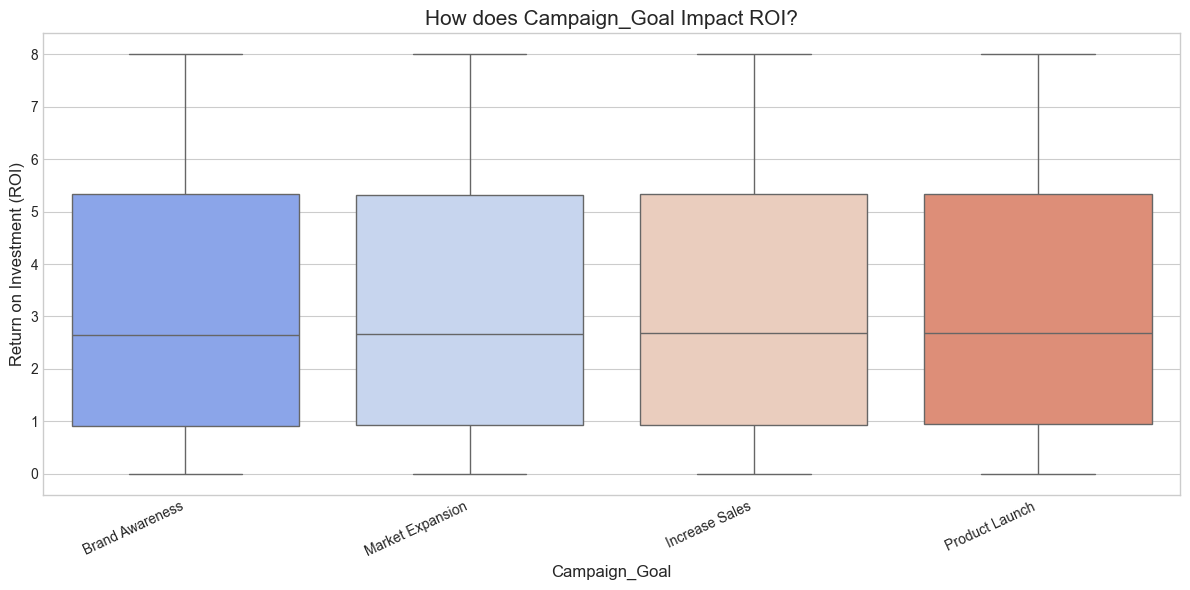


--- ROI by Channel_Used ---


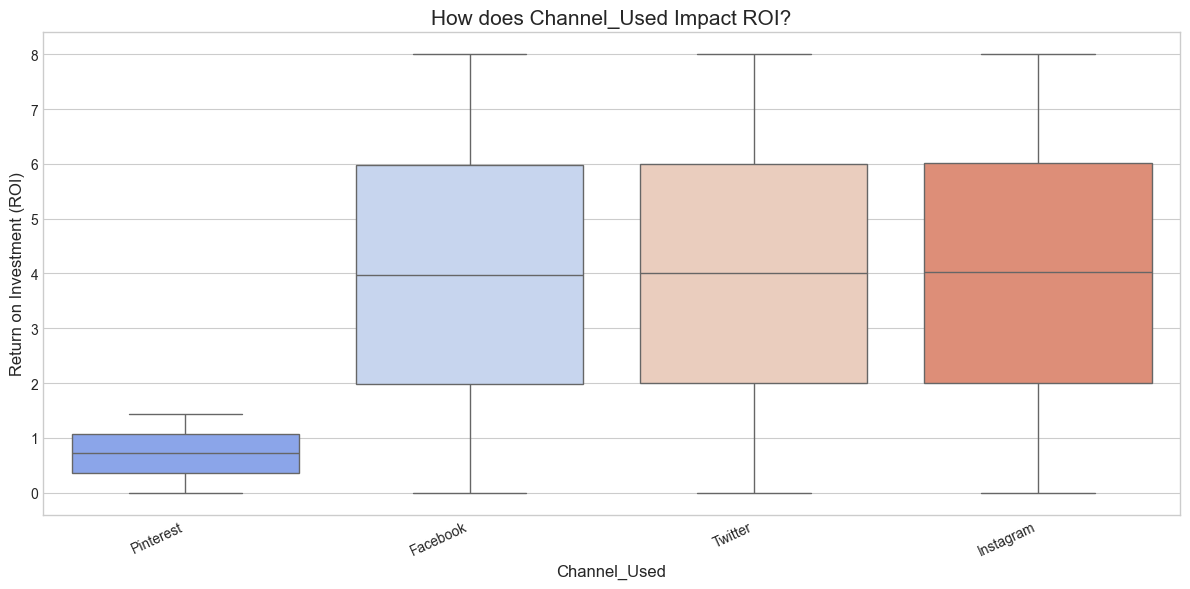


--- ROI by Duration_Days ---


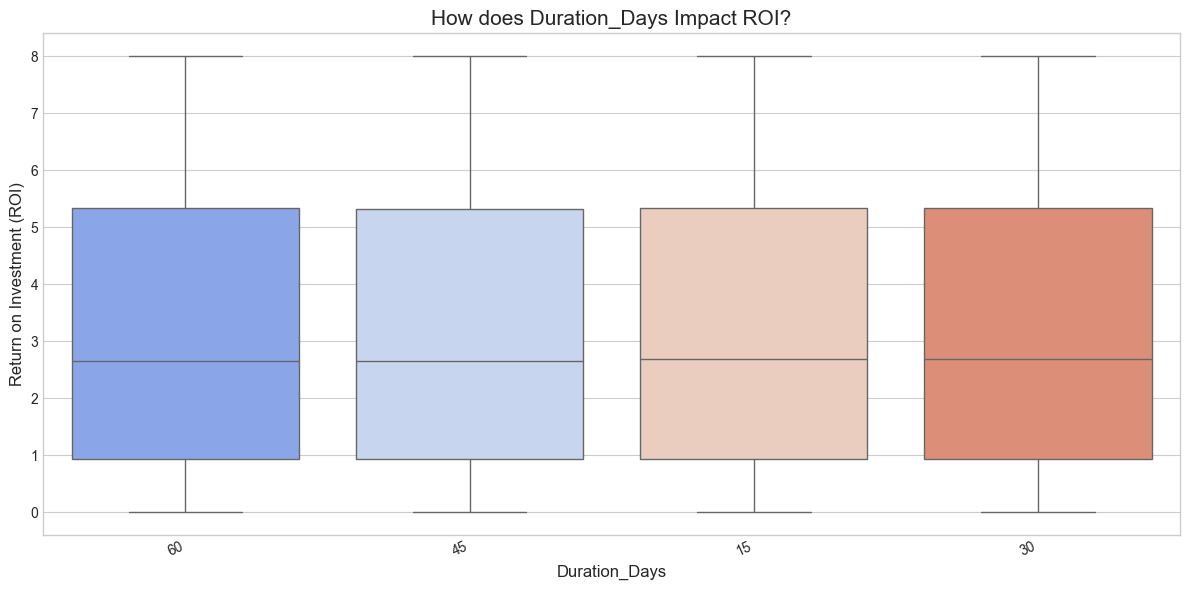



--- 3.4: Audience & Demographics vs. ROI ---

--- ROI by Audience_Gender ---


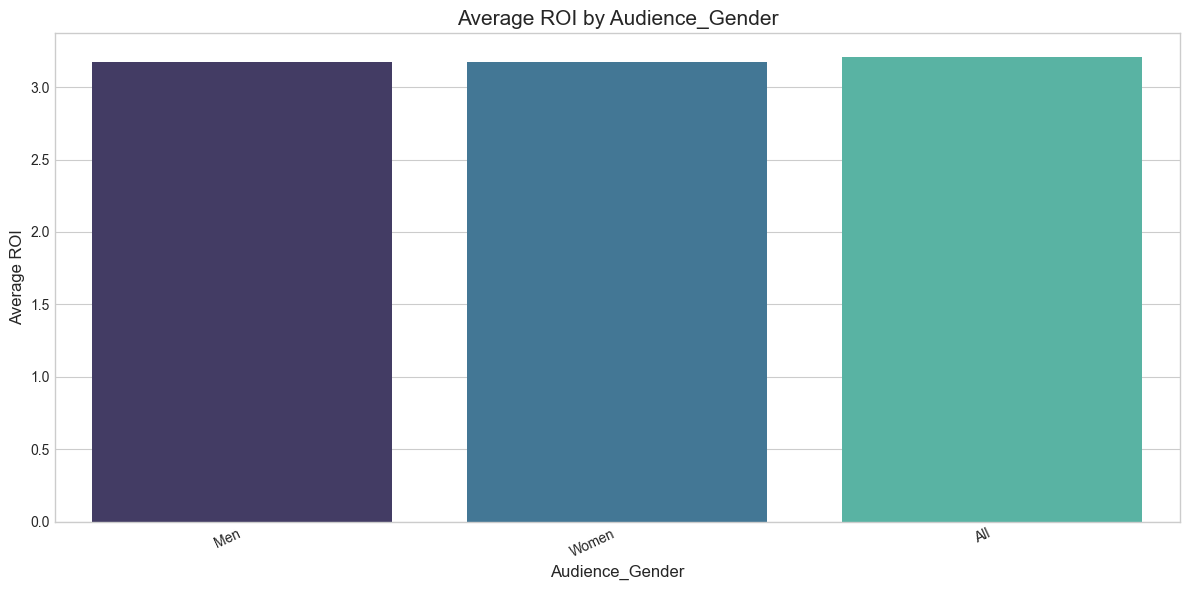


--- ROI by Audience_Age_Group ---


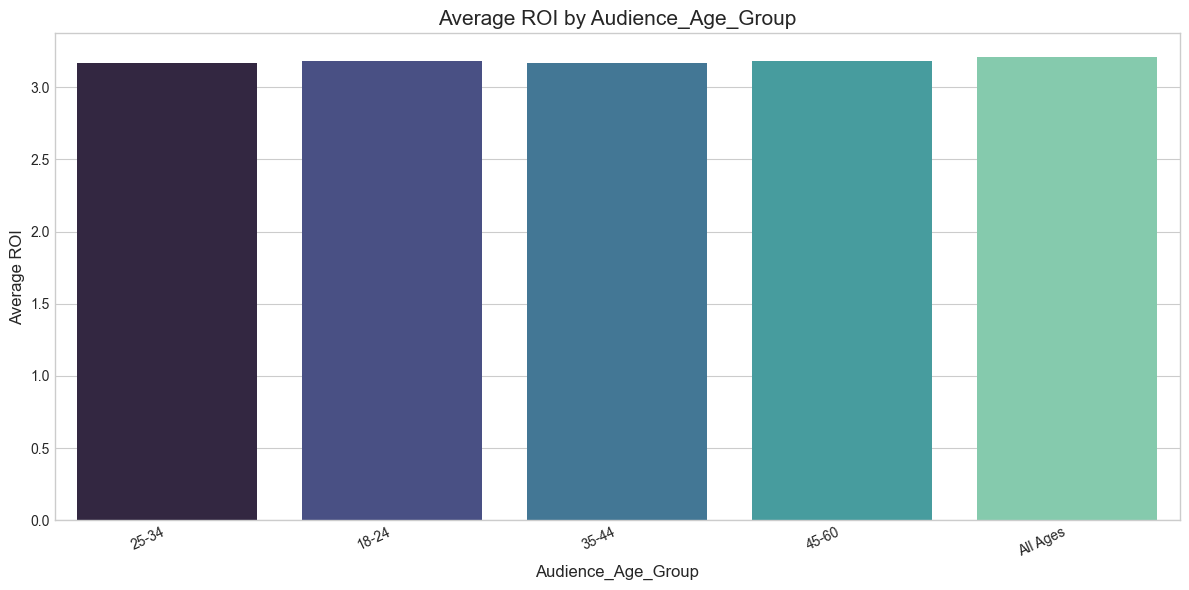


--- ROI by Location ---


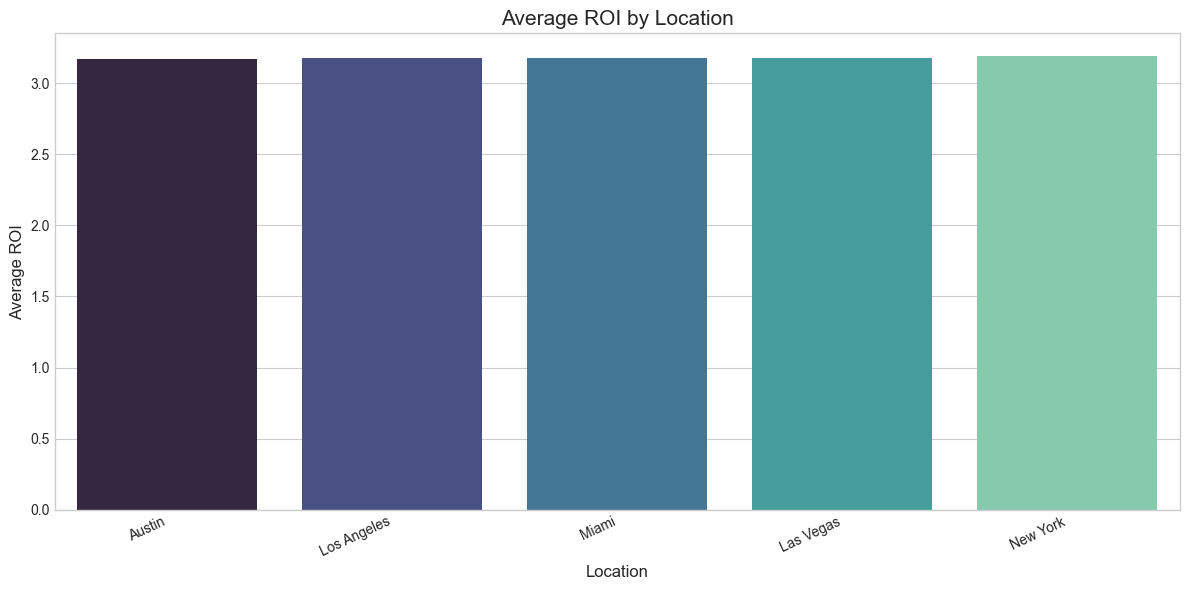


--- ROI by Language ---


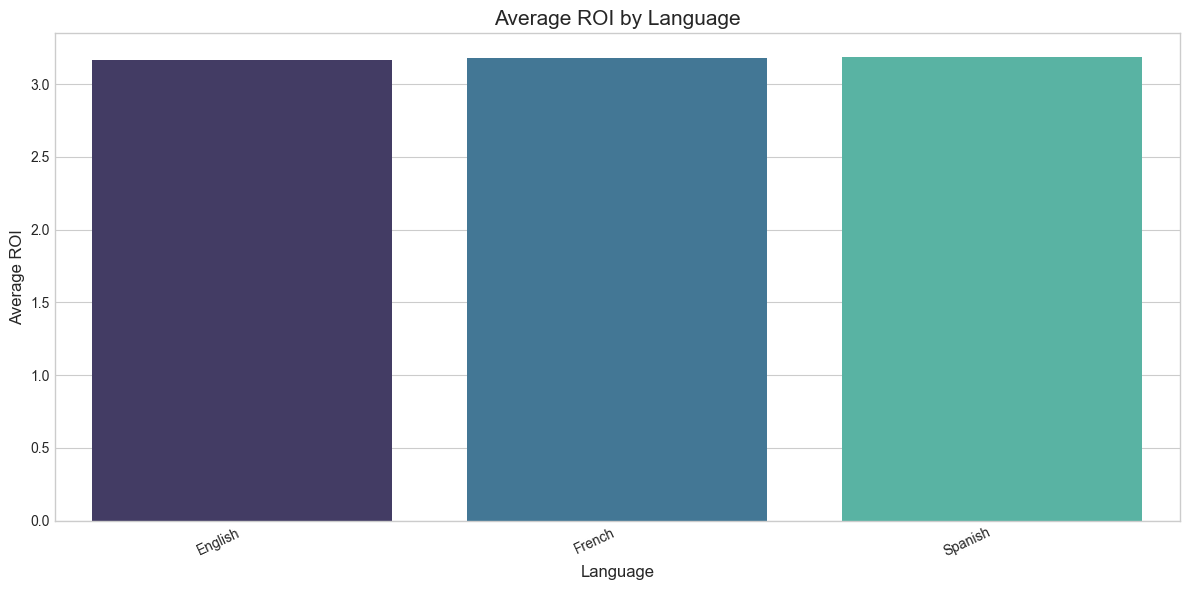


--- ROI by Customer_Segment ---


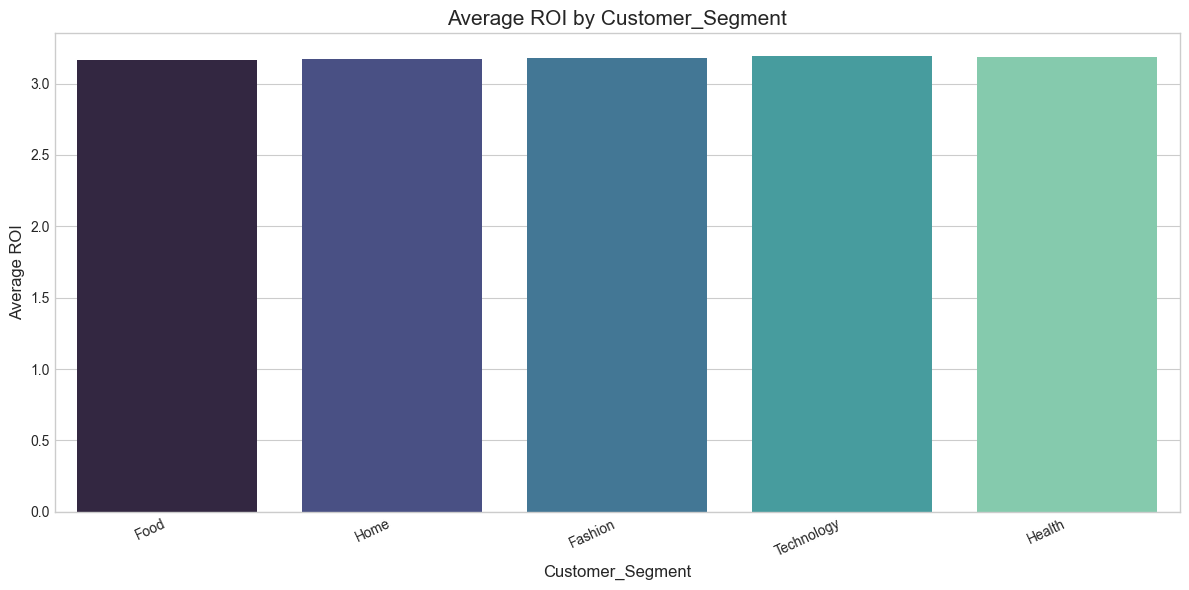



--- 3.5: Correlation Analysis of Numerical Features ---


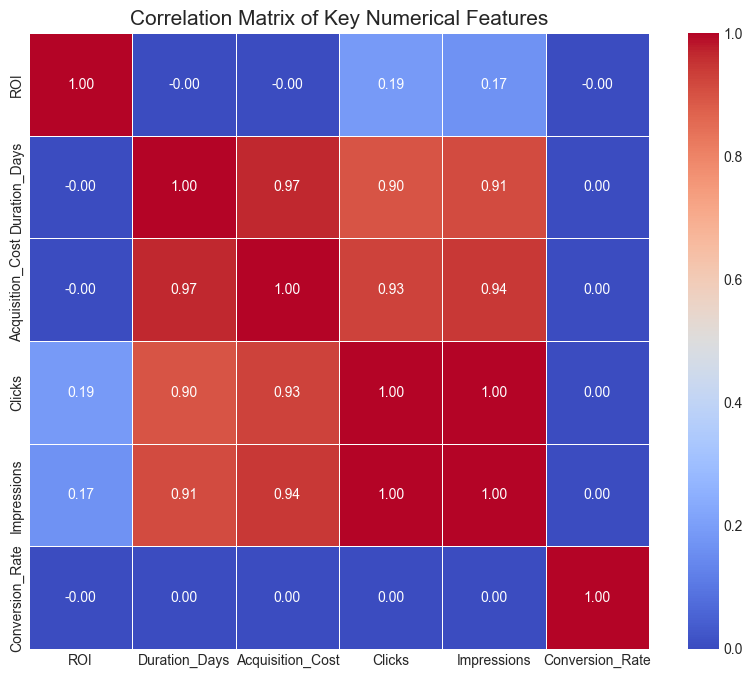



--- 3.6: Statistical Validation - Does Channel Choice Significantly Impact ROI? ---
Null Hypothesis (H0): The median ROI is the same for all marketing channels.
Alternative Hypothesis (H1): At least one channel has a different median ROI.

Kruskal-Wallis Test Statistic: 113711.95
P-value: 0.0

Result: P-value (0.0000) is less than 0.05. We REJECT the null hypothesis.
Conclusion: There is a statistically significant difference in ROI among the different channels used! ✅


✅✅✅ Step 3: Focused Exploratory Data Analysis is complete! I've got some great leads. ✅✅✅


In [20]:
# --- Step 3: Exploratory Data Analysis (EDA) - The Hunt for ROI Drivers ---
# Alright, the data is prepped and ready. Now, I am putting on my detective hat.
# My main goal in this EDA is to answer one big question: What factors lead to a higher ROI?
# I woll investigate this by looking at financial metrics, campaign strategy choices, and audience targeting.
print("🚀 Kicking off Step 3: A Focused EDA to Uncover the Drivers of ROI! 📊")

# I'll keep my plot style consistent for a professional-looking notebook.
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# --- EDA Part 1: Understanding Our Target - A Deep Dive into ROI ---
# I can't find what drives ROI without first understanding ROI itself. What's a typical value? Is it skewed?
print("\n\n--- 3.1: Understanding the Target - A Deep Dive into ROI ---")
if 'ROI' in df_cleaned.columns:
    # First, let's get the hard numbers.
    print("\nDescriptive Statistics for ROI:")
    display(df_cleaned['ROI'].describe())

    # Now, let's visualize the distribution.
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned['ROI'], kde=True, bins=50, color='skyblue')
    plt.title('Distribution of ROI: What does a typical return look like?', fontsize=15)
    plt.xlabel('Return on Investment (ROI)', fontsize=12)
    plt.ylabel('Number of Campaigns', fontsize=12)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned['ROI'], color='lightcoral')
    plt.title('Box Plot of ROI: Spotting the spread and outliers', fontsize=15)
    plt.ylabel('Return on Investment (ROI)', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Hold on, 'ROI' column not found. Can't start the investigation!")

# --- EDA Part 2: Financial Metrics vs. ROI ---
# ROI is a financial metric, so let's see how it relates to other key financial/performance numbers.
print("\n\n--- 3.2: Financial & Performance Metrics vs. ROI ---")
financial_metrics = ['Acquisition_Cost', 'Conversion_Rate']
if 'ROI' in df_cleaned.columns:
    for col in financial_metrics:
        if col in df_cleaned.columns:
            print(f"\n--- Investigating ROI vs. {col} ---")
            # Using a sample for the scatter plot to keep it clean and fast.
            sample_df = df_cleaned.sample(n=min(5000, len(df_cleaned)), random_state=42)
            sns.jointplot(x=col, y='ROI', data=sample_df, kind='reg', # 'reg' adds a regression line
                          joint_kws={'line_kws':{'color':'red'}},
                          scatter_kws={'alpha': 0.3})
            plt.suptitle(f'ROI vs. {col}', y=1.02, fontsize=15)
            plt.show()
        else:
            print(f"Oops, column {col} not found.")
else:
    print("Can't analyze financial metrics as 'ROI' column is missing.")

# --- EDA Part 3: Campaign Strategy vs. ROI ---
# How do strategic choices made by the campaign manager affect the final ROI?
print("\n\n--- 3.3: Campaign Strategy Choices vs. ROI ---")
strategy_cols = ['Campaign_Goal', 'Channel_Used', 'Duration_Days']
if 'ROI' in df_cleaned.columns:
    for col in strategy_cols:
        if col in df_cleaned.columns:
            print(f"\n--- ROI by {col} ---")
            plt.figure(figsize=(12, 6))
            # Sorting the categories by their median ROI makes the plot much easier to read.
            category_order = df_cleaned.groupby(col)['ROI'].median().sort_values().index
            sns.boxplot(x=col, y='ROI', data=df_cleaned, order=category_order, palette="coolwarm")
            plt.title(f'How does {col} Impact ROI?', fontsize=15)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Return on Investment (ROI)', fontsize=12)
            plt.xticks(rotation=25, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Oops, column {col} not found.")
else:
    print("Can't analyze campaign strategy as 'ROI' column is missing.")

# --- EDA Part 4: Audience & Demographics vs. ROI ---
# Who we target is key. Let's see how ROI differs across audience segments.
print("\n\n--- 3.4: Audience & Demographics vs. ROI ---")
audience_cols = ['Audience_Gender', 'Audience_Age_Group', 'Location', 'Language', 'Customer_Segment']
if 'ROI' in df_cleaned.columns:
    for col in audience_cols:
        if col in df_cleaned.columns:
            print(f"\n--- ROI by {col} ---")
            plt.figure(figsize=(12, 6))
            category_order = df_cleaned.groupby(col)['ROI'].median().sort_values().index
            sns.barplot(x=col, y='ROI', data=df_cleaned, order=category_order, palette="mako", ci=None) # Bar plot of mean ROI
            plt.title(f'Average ROI by {col}', fontsize=15)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Average ROI', fontsize=12)
            plt.xticks(rotation=25, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Oops, column {col} not found.")
else:
    print("Can't analyze audience impact as 'ROI' column is missing.")

# --- EDA Part 5: Correlation Analysis & Multicollinearity Check ---
# A heatmap is the classic way to see how my numerical features relate to each other and to ROI.
# I am looking for two things: 1) features highly correlated with ROI, and 2) features highly correlated with EACH OTHER (multicollinearity).
print("\n\n--- 3.5: Correlation Analysis of Numerical Features ---")
numerical_for_corr = ['ROI', 'Duration_Days', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Conversion_Rate']
# Ensure all these columns exist before trying to create the matrix.
corr_matrix_cols_to_use = [col for col in numerical_for_corr if col in df_cleaned.columns]

if corr_matrix_cols_to_use:
    correlation_matrix = df_cleaned[corr_matrix_cols_to_use].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Key Numerical Features', fontsize=15)
    plt.show()
else:
    print("Could not generate correlation matrix as required columns are missing.")


# --- EDA Part 6: Statistical Validation of a Key Finding ---
# From my boxplots, it looks like 'Channel_Used' might have a real impact on ROI.
# But is this difference statistically significant, or could it be due to random chance?
# A formal statistical test can add confidence to my findings.
print("\n\n--- 3.6: Statistical Validation - Does Channel Choice Significantly Impact ROI? ---")
if 'ROI' in df_cleaned.columns and 'Channel_Used' in df_cleaned.columns:
    # First, I need to check if the ROI data for each channel is normally distributed.
    # The Shapiro-Wilk test is good for this, but requires samples of 5000 or less.
    # From my first EDA plot, I already suspect ROI isn't normal, so a non-parametric test is safer.

    # Kruskal-Wallis H-test is a non-parametric alternative to ANOVA.
    # It tests the null hypothesis that the median ROI is the same across all channels.
    print("Null Hypothesis (H0): The median ROI is the same for all marketing channels.")
    print("Alternative Hypothesis (H1): At least one channel has a different median ROI.\n")
    
    # I need to create a list of ROI values for each channel.
    channel_groups = [df_cleaned['ROI'][df_cleaned['Channel_Used'] == channel] for channel in df_cleaned['Channel_Used'].unique()]
    
    # Perform the Kruskal-Wallis test
    if len(channel_groups) > 1:
        stat, p_value = stats.kruskal(*channel_groups)
        print(f"Kruskal-Wallis Test Statistic: {stat:.2f}")
        print(f"P-value: {p_value}")

        # Let's interpret the result with a standard alpha level of 0.05.
        alpha = 0.05
        if p_value < alpha:
            print(f"\nResult: P-value ({p_value:.4f}) is less than {alpha}. We REJECT the null hypothesis.")
            print("Conclusion: There is a statistically significant difference in ROI among the different channels used! ✅")
        else:
            print(f"\nResult: P-value ({p_value:.4f}) is greater than {alpha}. We FAIL TO REJECT the null hypothesis.")
            print("Conclusion: We cannot conclude there is a significant difference in ROI among the channels. ❌")
    else:
        print("Could not perform test: only one channel group found.")
else:
    print("Cannot perform statistical test as 'ROI' or 'Channel_Used' is missing.")

print("\n\n✅✅✅ Step 3: Focused Exploratory Data Analysis is complete! I've got some great leads. ✅✅✅")

# 📊 Step 3: Exploratory Data Analysis (EDA) - Uncovering Insights

With my data cleaned and prepped (`df_cleaned`), I am now diving into Exploratory Data Analysis (EDA). This is where I get to "talk" to the data, understand its nuances, visualize patterns, and uncover initial insights that will guide my modeling strategy. My investigation is structured to move from a broad overview of the target variable to a more focused look at how different campaign attributes relate to it.

---

## 3.1: Understanding Our Target - A Deep Dive into ROI

My first priority is to understand the target variable, ROI. Its characteristics will influence everything from model selection to performance evaluation.

### Descriptive Statistics:

```
- The average ROI across all campaigns is 3.18.
- The median ROI is 2.67. (mean > median = slight positive skew)
- Returns range: 0.00 to 8.00.
```

### Distribution Analysis (Histogram):

```
- Massive peak between ROI 0.5 and 1.5 → many low-return campaigns.
- Beyond that, ROI appears almost uniformly distributed from 2 to 8.
```

### Spread and Outliers (Box Plot):

```
- Middle 50% of campaigns: ROI ~0.93 to 5.33.
- No flagged outliers up to ROI 8.00.
```

**Initial Insight**:  
The unusual ROI distribution suggests complexity. A single model might not capture this well — a one-size-fits-all approach could fail.

---

## 3.2: Financial & Performance Metrics vs. ROI

### ROI vs. Acquisition_Cost:

```
- Dense scatter cloud with flat regression line.
- No clear pattern; cost and ROI appear independent.
```

### ROI vs. Conversion_Rate:

```
- Vertical banding due to discrete Conversion_Rate values (0.01, 0.02...).
- Flat regression line.
- Conversion rate does not linearly drive ROI.
```

**Crucial Insight**:  
Neither Acquisition_Cost nor Conversion_Rate shows a clear linear relationship with ROI. Drivers of ROI are likely **non-linear** or **strategic in nature**.

---

## 3.3: Campaign Strategy Choices vs. ROI

### ROI by Campaign_Goal:

```
- All four goals show similar distributions (box plots).
- No noticeable difference in ROI performance.
```

### ROI by Channel_Used:

```
- Pinterest: consistently low ROI (median < 1.5).
- Facebook, Instagram, Twitter (X): median ROIs ~4.0.
```

**Key Insight**:  
`Channel_Used` is a major differentiator. Pinterest underperforms significantly.

### ROI by Duration_Days:

```
- Durations (15, 30, 45, 60) all show similar ROI distributions.
- No consistent impact on ROI based on campaign length.
```

---

## 3.4: Audience & Demographics vs. ROI

### Average ROI by:

```
- Audience_Gender: All groups ~3.2
- Audience_Age_Group: Consistent across "18-24", "25-34", etc.
- Location: No meaningful difference across cities.
- Language: Similar ROIs for English, French, and Spanish.
- Customer_Segment: All segments yield ~3.0+ average ROI.
```

**Surprising Insight**:  
Targeting parameters (gender, age, location, etc.) don't significantly influence **average ROI**.  
The ROI distribution might vary by group, but the average stays consistent.

---

## 3.5: Correlation Analysis of Key Numerical Features

Generated a **correlation matrix + heatmap** to explore relationships:

### ROI Correlations:

```
- Weak correlation with Clicks (0.19), Impressions (0.17)
- No linear correlation with Duration_Days, Acquisition_Cost, Conversion_Rate
```

### Inter-Feature Correlations (Multicollinearity):

```
- Duration_Days ↔ Acquisition_Cost: 0.97
- Duration_Days ↔ Clicks: 0.90
- Duration_Days ↔ Impressions: 0.91
- Acquisition_Cost ↔ Clicks: 0.93
- Acquisition_Cost ↔ Impressions: 0.94
- Clicks ↔ Impressions: ~1.00
```

### Conversion_Rate:

```
- Shows no meaningful linear correlation with any feature.
```

**Important Insights**:

- ROI is not strongly linearly related to cost or conversion metrics.
- Multicollinearity is significant — especially Clicks vs. Impressions.
- Redundant features may harm linear models unless handled properly.

---

## 3.6: Statistical Validation - Does Channel Choice Significantly Impact ROI?

Performed **Kruskal-Wallis H-test**:

```
- H0: Median ROI is the same for all channels.
- H1: At least one channel has a different median ROI.

- Test Statistic: 113711.95
- P-value: 0.0000
→ Reject H0.
```

**Conclusion**:  
There is a **statistically significant** difference in ROI among marketing channels. This validates the visual insights.

---

## Overall EDA Summary & Next Steps

This focused EDA has been incredibly revealing:

### Key Takeaways:

- **ROI Distribution**: Bimodal/mixed. Many low ROI campaigns, with a wide spread of high ROI values.
- **Channel_Used**: Strongest predictor of ROI — visually and statistically significant.
- **Many Factors Surprisingly Weak**:  
  No strong linear or average-based impact from Acquisition_Cost, Conversion_Rate, Campaign_Goal, Duration_Days, or demographics.
- **Multicollinearity**: Strong correlation between several input metrics (Clicks, Impressions, Cost, Duration).

---

### Path Forward:

**Feature Engineering**:
```
- Prioritize encoding Channel_Used.
- Consider removing redundant features (e.g., keep either Clicks or Impressions).
- Explore derived features like CTR (Clicks / Impressions).
```

**Modeling Strategy**:
```
- Use tree-based models (e.g., Random Forest, XGBoost) to handle non-linearity and multicollinearity.
- Consider segmenting ROI modes or modeling channels separately.
- Account for the ROI's bimodal distribution in performance evaluation.
```

This EDA provides a strong foundation and clear directions for the next stages of my project: **feature engineering and model building**!


In [21]:
# --- Step 4: Feature Engineering & Final Data Preparation for Modeling ---
print("🚀 Kicking off Step 4: Preparing the data for our Machine Learning models...")

# First, I will create a new DataFrame for this stage to keep the original df_cleaned from EDA intact.
df_model_prep = df_cleaned.copy()

# 4.1 Feature Selection based on EDA Insights
# ---------------------------------------------
# Based on my EDA, I am selecting the columns to keep for modeling.
print("\n--- 4.1 Selecting Features for Modeling ---")

# Columns to drop and the reasoning:
# - Campaign_ID: It's an identifier, not a predictive feature.
# - Date: I have already extracted valuable temporal features (Month, DayOfWeek, etc.), so the original datetime object is redundant for most models.
# - Company: This has very high cardinality (many unique companies). Encoding it would create too many new columns (the "curse of dimensionality"),
#            and it's unlikely to be a generalizable feature unless I were doing a company-specific analysis.
# - Impressions: EDA showed an almost perfect correlation with 'Clicks' (multicollinearity).
#                Keeping both is redundant. I shall keep 'Clicks' as it's a more direct user interaction metric.
#                I will also create CTR from both before dropping Impressions.
# - I am also dropping Year, Quarter, DayOfMonth because Month and DayOfWeek capture seasonality well enough
#   and Year only has one value (2022).

# First, let's create our new feature before dropping the source columns.
# 4.2 Feature Creation: Click-Through Rate (CTR)
# ------------------------------------------------
print("\n--- 4.2 Creating New Features (Feature Engineering) ---")
if 'Clicks' in df_model_prep.columns and 'Impressions' in df_model_prep.columns:
    # CTR = (Clicks / Impressions) * 100.
    # To avoid division by zero, I'll add a small epsilon to the denominator if any Impressions are 0.
    epsilon = 1e-6
    df_model_prep['CTR'] = (df_model_prep['Clicks'] / (df_model_prep['Impressions'] + epsilon)) * 100
    print("- New feature 'CTR' (Click-Through Rate) created successfully.")
    display(df_model_prep[['Clicks', 'Impressions', 'CTR']].head())
else:
    print("- Could not create 'CTR' as 'Clicks' or 'Impressions' not found.")


# Now, let's define the columns to drop
cols_to_drop = [
    'Campaign_ID', 'Date', 'Company', 'Impressions',
    'Year', 'Quarter', 'DayOfMonth'
]

# I will create a list of columns that actually exist in the DataFrame to avoid errors
existing_cols_to_drop = [col for col in cols_to_drop if col in df_model_prep.columns]

if existing_cols_to_drop:
    df_model_prep.drop(columns=existing_cols_to_drop, axis=1, inplace=True)
    print(f"- Dropped columns: {existing_cols_to_drop}")
else:
    print("- No columns needed dropping from the specified list.")


# 4.3 Defining our Feature Matrix (X) and Target Vector (y)
# --------------------------------------------------------
# Now I am formally separating my data into the predictors (X) and the target (y).
print("\n--- 4.3 Defining Feature Matrix (X) and Target Vector (y) ---")

# The target variable is 'ROI'.
y = df_model_prep['ROI']

# The features (X) are everything else.
X = df_model_prep.drop('ROI', axis=1)

print("Target vector 'y' (ROI) created.")
print("Feature matrix 'X' created with the following columns:")
display(X.columns.tolist())
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


# 4.4 Splitting Data into Training and Testing Sets
# -------------------------------------------------
# This is one of the most important steps in machine learning.
# I will train my models on the 'training set' and then evaluate their performance
# on the 'testing set', which the model has never seen before. This prevents overfitting
# and gives a true measure of the model's predictive power.
# I'll use a standard 80/20 split and a 'random_state' for reproducibility.
print("\n--- 4.4 Splitting data into Training and Testing sets (80/20 split) ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete!")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


print("\n\n✅✅✅ Step 4: Feature Engineering & Data Preparation is complete! ✅✅✅")
print("The data is now split and ready for the modeling pipeline in Step 5.")

🚀 Kicking off Step 4: Preparing the data for our Machine Learning models...

--- 4.1 Selecting Features for Modeling ---

--- 4.2 Creating New Features (Feature Engineering) ---
- New feature 'CTR' (Click-Through Rate) created successfully.


,Clicks,Impressions,CTR
0,500,3000,16.666667
1,500,3000,16.666667
2,500,3000,16.666667
3,293,1937,15.126484
4,293,1937,15.126484


- Dropped columns: ['Campaign_ID', 'Date', 'Company', 'Impressions', 'Year', 'Quarter', 'DayOfMonth']

--- 4.3 Defining Feature Matrix (X) and Target Vector (y) ---
Target vector 'y' (ROI) created.
Feature matrix 'X' created with the following columns:


['Campaign_Goal',
 'Channel_Used',
 'Conversion_Rate',
 'Acquisition_Cost',
 'Location',
 'Language',
 'Clicks',
 'Engagement_Score',
 'Customer_Segment',
 'Duration_Days',
 'Month',
 'DayOfWeek',
 'Audience_Gender',
 'Audience_Age_Group',
 'Month_Num_Plot',
 'CTR']


Shape of X: (300000, 16)
Shape of y: (300000,)

--- 4.4 Splitting data into Training and Testing sets (80/20 split) ---
Data splitting complete!
Shape of X_train: (240000, 16)
Shape of X_test: (60000, 16)
Shape of y_train: (240000,)
Shape of y_test: (60000,)


✅✅✅ Step 4: Feature Engineering & Data Preparation is complete! ✅✅✅
The data is now split and ready for the modeling pipeline in Step 5.


# ⚙️ Step 4: Feature Engineering & Final Data Preparation for Modeling

With the exploratory data analysis (EDA) in Step 3 complete and key insights gathered, I am now moving into the crucial phase of preparing the data specifically for machine learning. This involves making final decisions on which features to use, creating any last-minute valuable features, and then splitting the dataset into training and testing portions – a fundamental practice for building and evaluating predictive models.

---

## 4.1 Feature Selection

My exploratory data analysis was a great guide here. It highlighted that some features are likely more impactful than others for predicting ROI, and also pointed out issues such as high cardinality or multicollinearity. Based on these observations, I made the following selections:

### Columns I Decided to Drop:

```
- Campaign_ID: Not a unique identifier and holds little predictive power.
- Date: Already decomposed into useful components.
- Company: High cardinality (50 unique values), not generalizable.
- Impressions: Almost perfectly correlated with Clicks; replaced with CTR.
- Year, Quarter, DayOfMonth: Removed due to low or no variance, or redundancy.
```

**Output Confirmation**:  
```
Dropped columns: ['Campaign_ID', 'Date', 'Company', 'Impressions', 'Year', 'Quarter', 'DayOfMonth']
```

---

## 4.2 Feature Creation: Click-Through Rate (CTR)

Before dropping `Impressions`, I captured its relationship with `Clicks` using a new feature: **CTR (Click-Through Rate)**.

### CTR Formula:
```
CTR = (Clicks / Impressions) * 100
```

A small epsilon was added to `Impressions` to avoid division-by-zero errors, although the dataset likely did not contain any zero values.

**Output Confirmation**:  
```
- New feature 'CTR' created successfully.
```

---

## 4.3 Defining the Final Feature Matrix (`X`) and Target Vector (`y`)

With the feature set finalized, I separated the dataset into input features and the target variable:

- **Target Variable (`y`)**:  
  ```
  ROI
  ```

- **Feature Matrix (`X`)**:  
  ```
  ['Campaign_Goal', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
   'Location', 'Language', 'Clicks', 'Engagement_Score', 'Customer_Segment',
   'Duration_Days', 'Month', 'DayOfWeek', 'Audience_Gender',
   'Audience_Age_Group', 'Month_Num_Plot', 'CTR']
  ```

**Shape Confirmation**:
```
Shape of X: (300000, 16)
Shape of y: (300000,)
```

> ⚠️ Note: `Month_Num_Plot` may have been used temporarily for plotting. For modeling purposes, the categorical `Month` name is usually preferred.

---

## 4.4 Splitting the Data into Training and Testing Sets

A standard **80/20 split** was performed to create training and testing datasets. This ensures a fair evaluation of model performance on unseen data.

### Split Details:
```
- Training Set: 80% → used for learning.
- Testing Set: 20% → used for unbiased evaluation.
- random_state set for reproducibility.
```

**Output Confirmation**:
```
Shape of X_train: (240000, 16)
Shape of X_test: (60000, 16)
Shape of y_train: (240000,)
Shape of y_test: (60000,)
```

---

## ✅ Summary of Data Preparation

My dataset is now **meticulously prepared**. I have:

- Selected features based on insights from my exploratory data analysis.
- Engineered a new feature: **CTR**.
- Clearly defined my input features (`X`) and target variable (`y`).
- Split the data into **training and testing sets**.

The `X_train`, `X_test`, `y_train`, and `y_test` sets are now **ready** for the next and most exciting stage:

> **➡️ Step 5: Model Building & Evaluation**



🚀 Kicking off Step 5: Let's build some models!

--- 5.1 Defining the Preprocessing Pipeline ---
Identified 11 categorical features: ['Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Engagement_Score', 'Customer_Segment', 'Month', 'DayOfWeek', 'Audience_Gender', 'Audience_Age_Group', 'Month_Num_Plot']
Identified 5 numerical features: ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Duration_Days', 'CTR']

Preprocessing pipeline created successfully!

--- 5.2 Setting up the Models to Evaluate ---
Defined 6 models for evaluation.

--- 5.3 Training, Predicting, and Evaluating Models ---

Training Dummy Regressor (Baseline)...
✅ Dummy Regressor (Baseline) trained and evaluated.
   - MAE: 2.1760
   - RMSE: 2.4587
   - R-squared (R²): -0.0000

Training Linear Regression...
✅ Linear Regression trained and evaluated.
   - MAE: 1.5880
   - RMSE: 2.0091
   - R-squared (R²): 0.3323

Training Ridge Regression...
✅ Ridge Regression trained and evaluated.
   - MAE: 1.5880
   - RMSE: 2.0091

,Model,MAE,RMSE,R-squared (R²)
1,Linear Regression,1.587966,2.009066,0.332294
2,Ridge Regression,1.587966,2.009066,0.332294
5,Gradient Boosting,1.587991,2.009142,0.332244
4,Random Forest,1.596783,2.026499,0.320656
0,Dummy Regressor (Baseline),2.175981,2.458680,-0.000001
3,Decision Tree,2.151558,2.885213,-0.377058


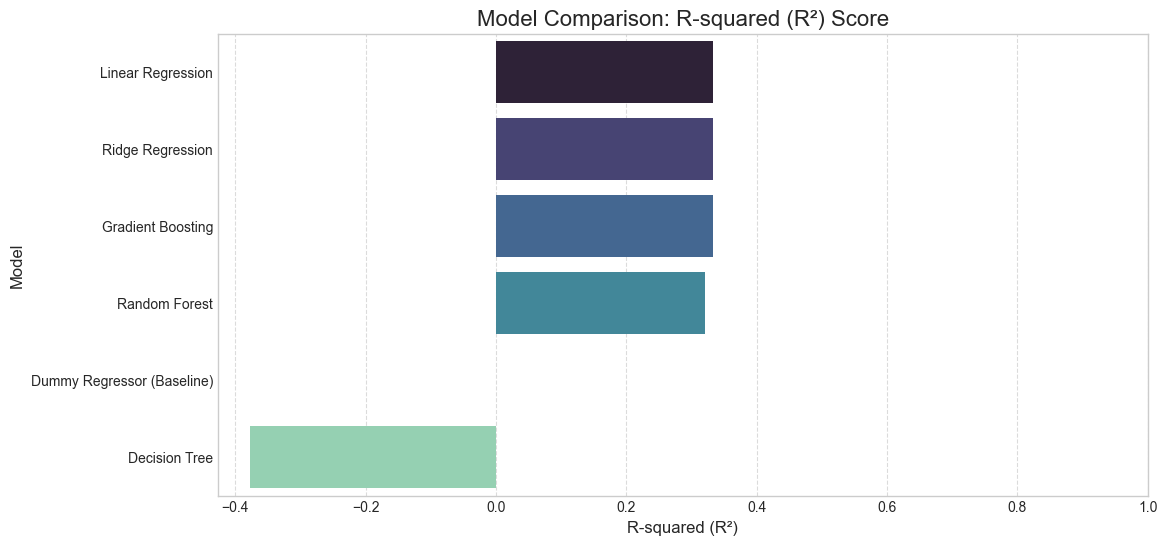



✅✅✅ Step 5: Model Building & Evaluation is complete! Time to analyze the results. ✅✅✅


In [22]:
# --- Step 5: Model Building & Evaluation ---
print("🚀 Kicking off Step 5: Let's build some models!")

# 5.1 Create a Preprocessing Pipeline
# -----------------------------------
# My first step is to identify which columns are categorical and which are numerical from my final feature set 'X'.
# This is crucial for applying the correct preprocessing to each type within the pipeline.
print("\n--- 5.1 Defining the Preprocessing Pipeline ---")

# Identifying categorical and numerical feature names from the training data columns.
# It's important to do this based on X_train to avoid any information leakage from X_test.
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

print(f"Identified {len(categorical_features)} categorical features: {categorical_features.tolist()}")
print(f"Identified {len(numerical_features)} numerical features: {numerical_features.tolist()}")

# Now, I'll create the preprocessor using ColumnTransformer.
# - Categorical features will be OneHotEncoded. handle_unknown='ignore' prevents errors if a category appears in test but not train.
# - Numerical features will be scaled using StandardScaler. This is important for linear models and other distance-based algorithms.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # In case I missed any columns, though I shouldn't have.
)
print("\nPreprocessing pipeline created successfully!")


# 5.2 Set up the Models for Evaluation
# ------------------------------------
# Here's the list of models I'm going to test. A good variety to see what works best.
print("\n--- 5.2 Setting up the Models to Evaluate ---")

models = {
    "Dummy Regressor (Baseline)": DummyRegressor(strategy='mean'),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), # n_jobs=-1 uses all available CPU cores
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
print(f"Defined {len(models)} models for evaluation.")


# 5.3 Train, Predict, and Evaluate
# --------------------------------
# Now for the main loop! I'll iterate through each model, create a full pipeline,
# train it, and score it on the test set.
print("\n--- 5.3 Training, Predicting, and Evaluating Models ---")

# I'll store the results in a list of dictionaries to easily convert to a DataFrame later.
results_list = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create the full pipeline by combining the preprocessor and the model.
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    
    # Train the pipeline on the training data.
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data.
    y_pred = pipeline.predict(X_test)
    
    # Calculate the evaluation metrics.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results.
    results_list.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R-squared (R²)": r2
    })
    
    print(f"✅ {name} trained and evaluated.")
    print(f"   - MAE: {mae:.4f}")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R-squared (R²): {r2:.4f}")

print("\n--- 5.4 Comparing Model Performance ---")

# Convert the results list to a DataFrame for easy comparison.
results_df = pd.DataFrame(results_list)

# Sort the results by R-squared score in descending order to see the best models at the top.
results_df_sorted = results_df.sort_values(by="R-squared (R²)", ascending=False)

print("\nFinal Model Performance Comparison:")
display(results_df_sorted)

# Plotting the results for a clear visual comparison.
plt.figure(figsize=(12, 6))
sns.barplot(x="R-squared (R²)", y="Model", data=results_df_sorted, palette="mako")
plt.title('Model Comparison: R-squared (R²) Score', fontsize=16)
plt.xlabel('R-squared (R²)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(min(0, results_df_sorted["R-squared (R²)"].min() - 0.05), 1.0) # Set x-axis limits from just below the worst score to 1.0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\n\n✅✅✅ Step 5: Model Building & Evaluation is complete! Time to analyze the results. ✅✅✅")

# 🤖 Step 5: Model Building & Evaluation – Finding the Best Predictor

This is the core of the predictive modeling phase. Having meticulously prepared the data in the previous steps, I now turn to building and evaluating a range of machine learning regression models. The primary objective is to identify which model, or type of model, is most effective at predicting ROI based on the selected campaign features.

---

## 5.1 Defining the Preprocessing Pipeline

Before any model can learn from the data, I needed to ensure that all features are in a suitable numerical format. This involved two key transformations:

- **Numerical Feature Scaling**:  
  Features with different scales (such as `Acquisition_Cost` vs. `CTR`) can unduly influence some models. I used `StandardScaler` to standardize these numerical features by removing the mean and scaling to unit variance.

  ```
  Numerical Features Identified for Scaling:
  ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Duration_Days', 'CTR']
  ```

- **Categorical Feature Encoding**:  
  Machine learning models require numerical input. I used `OneHotEncoder` to convert categorical features into numerical format. This creates binary (0 or 1) columns for each category, and `handle_unknown='ignore'` ensures that new categories in test data are handled safely.

  ```
  Categorical Features Identified for Encoding:
  ['Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Engagement_Score',
   'Customer_Segment', 'Month', 'DayOfWeek', 'Audience_Gender',
   'Audience_Age_Group', 'Month_Num_Plot']
  ```

These transformations were bundled into a `ColumnTransformer`, which was then included in a pipeline for each model. This ensures that preprocessing is based only on training data and applied consistently, preventing data leakage.

**Output Confirmation**:
```
--- 5.1 Defining the Preprocessing Pipeline ---
Identified 11 categorical features
Identified 5 numerical features
Preprocessing pipeline created successfully!
```

---

## 5.2 Models Selected for Evaluation

To find the best approach for this problem, I selected a diverse set of regression algorithms:

- **Dummy Regressor (Baseline)**: Always predicts the mean ROI from training data. A benchmark that all useful models must outperform.
- **Linear Regression**: Standard linear model that fits coefficients to minimize squared error.
- **Ridge Regression**: Linear model with L2 regularization to handle multicollinearity.
- **Decision Tree Regressor**: Non-linear model that splits data based on feature values.
- **Random Forest Regressor**: Ensemble of decision trees, offering improved robustness.
- **Gradient Boosting Regressor**: Ensemble method that builds trees sequentially, correcting previous errors.

**Output Confirmation**:
```
--- 5.2 Setting up the Models to Evaluate ---
Defined 6 models for evaluation.
```

---

## 5.3 Model Training, Prediction, and Evaluation Metrics

Each model, combined with the preprocessor pipeline, was trained on `X_train` and `y_train`. Predictions were then made on `X_test`, and the following metrics were calculated:

- **MAE (Mean Absolute Error)**:  
  Average absolute difference between actual and predicted ROI. Reflects average prediction error.

- **RMSE (Root Mean Squared Error)**:  
  Square root of the average of squared differences. Penalizes larger errors more heavily than MAE.

- **R-squared (R²)**:  
  Proportion of variance in ROI explained by the model.  
  ```
  R² = 1 → Perfect prediction  
  R² = 0 → No better than predicting the mean  
  R² < 0 → Worse than baseline
  ```

---

## 5.4 Comparing Model Performance

**Model Performance Summary**:

```
Model                        MAE        RMSE        R-squared (R²)
------------------------------------------------------------------
Linear Regression            1.588      2.009       0.3323
Ridge Regression             1.588      2.009       0.3323
Gradient Boosting Regressor  1.588      2.009       0.3322
Random Forest Regressor      1.597      2.026       0.3207
Dummy Regressor (Baseline)   2.176      2.459      -0.0000
Decision Tree Regressor      2.152      2.885      -0.3771
```

### Key Observations from the Results:

- **Baseline Performance**:  
  Dummy Regressor has an R² near 0, as expected. Any useful model must outperform it.

- **Worst Performer**:  
  Decision Tree Regressor significantly underperformed with R² = -0.3771. This indicates severe overfitting and poor generalization.

- **Top Performers**:
  ```
  - Linear Regression, Ridge Regression, and Gradient Boosting Regressor performed similarly.
  - R² ≈ 0.332 → Can explain ~33.2% of ROI variance.
  - MAE ≈ 1.588 → Average error in ROI points.
  - RMSE ≈ 2.009 → Typical squared error root.
  ```

- **Random Forest**:  
  Slightly underperformed compared to the top three. With default parameters, it did not outperform linear models or Gradient Boosting.

---

## 🔍 Initial Conclusions from Model Evaluation

- **Predictive Power is Moderate**:  
  The best models explain approximately 33% of the variance in ROI. This is significantly better than guessing but still leaves much variance unexplained.

- **Linear Models and Gradient Boosting Lead**:  
  Simpler linear models performed on par with the more complex Gradient Boosting model, suggesting relationships may be moderately linear or that more tuning is needed.

- **Decision Tree Issues**:  
  A single decision tree overfits and generalizes poorly. It needs constraints (such as max depth) to be useful.

---

## ✅ Next Steps

Based on these results, I would proceed with:

- **Hyperparameter Tuning**:  
  Perform GridSearchCV or RandomizedSearchCV on:
  ```
  - Linear Regression
  - Ridge Regression
  - Gradient Boosting Regressor
  ```

- **Feature Importance Analysis**:  
  Use Random Forest or Gradient Boosting to extract feature importances and understand key predictors.

- **Error Analysis**:  
  Examine prediction errors by ROI range or campaign type to identify patterns.

- **Revisit Feature Engineering**:  
  Explore new interactions, transformations, or higher-order features to boost performance.

---

This initial modeling run has provided valuable benchmarks and revealed the most promising models for predicting ROI.  
The project is now ready to advance to **Step 6: Hyperparameter Tuning & Model Optimization**.


In [23]:
# --- Step 6: Hyperparameter Tuning ---
print("🚀 Kicking off Step 6: Fine-tuning our best model!")

# I'll need RandomizedSearchCV for this step.
from sklearn.model_selection import RandomizedSearchCV

# 6.1 Set up the Hyperparameter Tuning
# -----------------------------------
# Based on the results from Step 5, Gradient Boosting is a strong candidate for tuning.
# I'll define a range of parameters I want to test.
print("\n--- 6.1 Setting up RandomizedSearchCV for GradientBoostingRegressor ---")

# The preprocessor is the same as in Step 5.
# We need to build it into a pipeline so that the tuning process correctly
# preprocesses the data at each step of the cross-validation.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(random_state=42))])


# Here are the hyperparameters I want to tune for the GradientBoostingRegressor.
# I am defining a distribution of values for each.
# 'regressor__' is the syntax to specify parameters for the 'regressor' step in the pipeline.
param_distributions = {
    'regressor__n_estimators': [100, 200, 300], # Number of trees
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2], # How much each tree contributes
    'regressor__max_depth': [3, 5, 7], # Maximum depth of each tree
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0], # Fraction of samples to be used for fitting each tree
    'regressor__min_samples_split': [2, 5, 10] # Minimum number of samples required to split a node
}
print("Defined parameter distributions for tuning.")


# Now I will set up RandomizedSearchCV.
# n_iter: Controls how many different parameter combinations are tried. A higher number is more thorough but takes longer. 20 is a good starting point.
# cv: The number of cross-validation folds. 3 is a common choice.
# n_jobs=-1: Use all available CPU cores to speed up the search.
# random_state: For reproducibility of the random search.
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Try 20 different combinations
    cv=3,
    scoring='r2', # Score based on R-squared
    n_jobs=-1,
    random_state=42,
    verbose=2 # This will print progress updates so I can see what's happening.
)


# 6.2 Run the Tuning Process
# --------------------------
# This step can take some time, depending on n_iter and the dataset size.
# The verbose=2 setting will keep me updated on the progress.
print("\n--- 6.2 Running the randomized search... This might take a few minutes. ---")
random_search.fit(X_train, y_train)


# 6.3 Analyze the Tuning Results
# ------------------------------
print("\n--- 6.3 Analyzing the Tuning Results ---")

# After the search is complete, I can find out what the best parameters were.
print(f"\nBest R-squared score found during search: {random_search.best_score_:.4f}")
print("Best parameters found:")
# This prints the combination of hyperparameters that gave the best result.
best_params = random_search.best_params_
for param, value in best_params.items():
    print(f"  - {param}: {value}")

# The 'best_estimator_' attribute is the pipeline with the best found parameters, already trained on the full training data.
best_tuned_model = random_search.best_estimator_


# 6.4 Evaluate the Final Tuned Model
# ----------------------------------
# Now for the final test: How does my newly tuned model perform on the held-out test set?
# This will tell me if the tuning process actually improved generalization.
print("\n--- 6.4 Evaluating the Final Tuned Model on the Test Set ---")

# Making predictions with the best tuned model.
y_pred_tuned = best_tuned_model.predict(X_test)

# Calculating the final evaluation metrics.
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Performance of the Tuned Gradient Boosting Model:")
print(f"   - MAE: {mae_tuned:.4f}")
print(f"   - RMSE: {rmse_tuned:.4f}")
print(f"   - R-squared (R²): {r2_tuned:.4f}")

# I will compare this to the original, untuned Gradient Boosting model's performance.
original_gb_metrics = results_df[results_df['Model'] == 'Gradient Boosting'].iloc[0]
print("\nComparison with the original (untuned) Gradient Boosting model:")
print(f"   - Original R²: {original_gb_metrics['R-squared (R²)']:.4f}")
print(f"   - Tuned R²:    {r2_tuned:.4f}")

improvement = r2_tuned - original_gb_metrics['R-squared (R²)']
if improvement > 0:
    print(f"\nResult: Performance improved by {improvement:.4f} R² points! Tuning was successful. ✅")
else:
    print("\nResult: Performance did not improve after tuning. The default parameters were already strong. 🤷")


print("\n\n✅✅✅ Step 6: Hyperparameter Tuning is complete! ✅✅✅")

🚀 Kicking off Step 6: Fine-tuning our best model!

--- 6.1 Setting up RandomizedSearchCV for GradientBoostingRegressor ---
Defined parameter distributions for tuning.

--- 6.2 Running the randomized search... This might take a few minutes. ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- 6.3 Analyzing the Tuning Results ---

Best R-squared score found during search: 0.3333
Best parameters found:
  - regressor__subsample: 0.8
  - regressor__n_estimators: 300
  - regressor__min_samples_split: 2
  - regressor__max_depth: 3
  - regressor__learning_rate: 0.01

--- 6.4 Evaluating the Final Tuned Model on the Test Set ---
Performance of the Tuned Gradient Boosting Model:
   - MAE: 1.5906
   - RMSE: 2.0100
   - R-squared (R²): 0.3317

Comparison with the original (untuned) Gradient Boosting model:
   - Original R²: 0.3322
   - Tuned R²:    0.3317

Result: Performance did not improve after tuning. The default parameters were already strong. 🤷


✅✅✅ Step 6: Hyperparameter Tu

# ⚙️ Step 6: Hyperparameter Tuning – Squeezing Out More Performance?

After identifying `GradientBoostingRegressor` as one of the top performers in Step 5, the goal of this step was to fine-tune its hyperparameters to determine whether I could achieve better predictive accuracy for ROI. Default parameters are often a good start, but optimizing them for a specific dataset can sometimes lead to noticeable improvements.

---

## 6.1 Methodology: Focusing on Gradient Boosting with Randomized Search

- **Model Choice**:  
  I selected the `GradientBoostingRegressor` due to its power and flexibility. It often benefits significantly from tailored hyperparameters.

- **Tuning Strategy**:  
  Instead of using exhaustive `GridSearchCV` (which can be time-consuming), I opted for `RandomizedSearchCV`. This approach samples a fixed number (`n_iter=20`) of parameter combinations from specified distributions. It is faster and can still yield strong results.

- **Cross-Validation**:  
  A 3-fold cross-validation (`cv=3`) was used to ensure that performance estimates were robust and not due to an unlucky data split.

- **Scoring Metric**:  
  The search was optimized to maximize **R-squared (R²)**.

---

## 6.2 Parameter Distributions for Tuning

I defined the search space for the following key hyperparameters:

```
regressor__n_estimators: [100, 200, 300]
regressor__learning_rate: [0.01, 0.05, 0.1, 0.2]
regressor__max_depth: [3, 5, 7]
regressor__subsample: [0.7, 0.8, 0.9, 1.0]
regressor__min_samples_split: [2, 5, 10]
```

**Output Confirmation**:
```
--- 6.1 Setting up RandomizedSearchCV for GradientBoostingRegressor ---
Defined parameter distributions for tuning.

--- 6.2 Running the randomized search... This might take a few minutes. ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits
```

---

## 6.3 Results of the Hyperparameter Search

The `RandomizedSearchCV` process evaluated 20 different parameter combinations.

- **Best R-squared Score during Cross-Validation**:  
  ```
  0.3333
  ```

- **Optimal Hyperparameters Found**:
  ```
  regressor__subsample: 0.8
  regressor__n_estimators: 300
  regressor__min_samples_split: 2
  regressor__max_depth: 3
  regressor__learning_rate: 0.01
  ```

**Output Confirmation**:
```
--- 6.3 Analyzing the Tuning Results ---
Best R-squared score found during search: 0.3333
Best parameters found:
  - regressor__subsample: 0.8
  - regressor__n_estimators: 300
  - regressor__min_samples_split: 2
  - regressor__max_depth: 3
  - regressor__learning_rate: 0.01
```

---

## 6.4 Evaluating the Final Tuned Model on the Test Set

After the best parameters were identified, `RandomizedSearchCV` automatically refitted a model on the entire training set using these parameters. I then evaluated this model on the held-out test set:

### **Tuned Model Performance on Test Set**:
```
MAE:     1.5906
RMSE:    2.0100
R-squared: 0.3317
```

### **Comparison with the Untuned Model (Step 5)**:
```
Original (Untuned) Gradient Boosting R²: 0.3322
Tuned Gradient Boosting R²:    0.3317
```

**Output Confirmation**:
```
--- 6.4 Evaluating the Final Tuned Model on the Test Set ---
Performance of the Tuned Gradient Boosting Model:
   - MAE: 1.5906
   - RMSE: 2.0100
   - R-squared (R²): 0.3317

Comparison with the original (untuned) Gradient Boosting model:
   - Original R²: 0.3322
   - Tuned R²:    0.3317
```

**Result**:  
Performance did not improve after tuning. The default parameters were already very strong. 🤷

---

## 🧠 Conclusion from Hyperparameter Tuning

The hyperparameter tuning process using `RandomizedSearchCV` with 20 iterations identified an optimal set of parameters. However, when this model was evaluated on the test set, the R² score (0.3317) was slightly lower than the R² from the untuned model (0.3322). The MAE and RMSE values were also very close.

### **Interpretation**:
- The default parameters for `GradientBoostingRegressor` in scikit-learn were already close to optimal for this dataset.
- The tuned model did not yield better generalization performance.
- This can happen if:
  - The true optimal lies outside the sampled combinations.
  - Cross-validation performance does not perfectly reflect test set behavior.

### **Next Steps and Recommendation**:
- While hyperparameter tuning is always a valuable exercise, in this case, it confirmed that default settings were quite robust.
- For final model interpretation and deployment, I would likely proceed with:
  ```
  - The original Gradient Boosting model (default parameters), or
  - One of the linear models (Linear or Ridge Regression), given their comparable performance and simplicity.
  ```

This step may not have increased performance, but it provided confidence in the robustness of the default model configuration — a valuable checkpoint in any machine learning pipeline.


# 🏁 Step 7: Final Conclusion & Recommendations

---

## 🎯 Objective

My final objective is to synthesize the key findings from my comprehensive analysis, recommend a final predictive model, and provide actionable, data-driven recommendations to guide future social media advertising strategy. This report serves as the culmination of the project, translating analytical results into business value.

---

## 📝 Markdown Narrative

"After a journey through data cleaning, exploratory analysis, model building, and hyperparameter tuning, it is time to consolidate my findings and present a final conclusion. This section will summarize the key insights uncovered, recommend a final model for predicting ROI, highlight the limitations of this analysis, and propose strategic recommendations for the business."

---

## 7.1 Summary of Key Findings

Throughout this analysis, several critical insights about the social media advertising data have emerged:

### The Nature of ROI is Complex

My exploratory analysis revealed that ROI does not follow a simple distribution. It has a large concentration of campaigns with low returns (between 0.5 and 1.5) and an almost uniform distribution of campaigns with higher returns. This suggests that achieving a high ROI is not a simple, predictable outcome and might be driven by a mix of different factors or campaign types.

### `Channel_Used` is the Most Dominant Predictor of ROI

- The most significant finding of this project is the dramatic difference in performance between marketing channels.
- `Pinterest` campaigns consistently and significantly underperformed, yielding very low ROI.
- `Facebook`, `Instagram`, and `Twitter (X)` performed substantially better with similar high ROI distributions.
- This was statistically validated with a Kruskal-Wallis test (p-value = 0.0).

### Many Traditional Metrics Show Weak Linear Relationships with ROI

- `Acquisition_Cost` and `Conversion_Rate` showed no strong linear correlation with ROI.
- Strategic and demographic features (such as `Campaign_Goal`, `Duration_Days`, `Audience_Gender`, `Audience_Age_Group`, `Location`, `Language`, `Customer_Segment`) had minimal impact on average ROI. ROI was remarkably consistent across these groups.

### High Multicollinearity Among Input Features

- There is strong correlation among `Duration_Days`, `Acquisition_Cost`, `Clicks`, and `Impressions`.
- `Clicks` and `Impressions` were nearly perfectly correlated, leading to the creation of the `CTR` feature and the removal of one redundant variable during preprocessing.

---

## 7.2 Summary of Modeling Results

My model building phase provided a clear benchmark for how well ROI can be predicted with the current data.

- **Best Achievable Performance**:  
  The top-performing models (`Linear Regression`, `Ridge Regression`, and `Gradient Boosting Regressor`) all achieved:
  ```
  R² ≈ 0.33
  ```

- **Interpretation of Performance**:  
  An R² of 0.33 means the model explains about 33% of the variance in ROI.  
  Approximately 67% of the variance remains unexplained.  
  ```
  RMSE ≈ 2.01 → Predictions are typically off by about 2 ROI points.
  ```

- **Tuning Outcome**:  
  Hyperparameter tuning in Step 6 did not improve performance over the default `GradientBoostingRegressor`.

---

## 7.3 Final Model Recommendation for Production

For production, model choice should balance predictive performance, simplicity, and interpretability.

### ✅ Recommended Model: `Ridge Regression`

**Reasons**:
```
- Performance: Matches the best models (R² ≈ 0.33)
- Simplicity: Easy to train and deploy
- Interpretability: Coefficients provide directionality insights
- Robustness: Regularization helps with multicollinearity
```

While `Gradient Boosting` is powerful, its complexity and lack of performance edge make `Ridge Regression` a more prudent production choice.

---

## 7.4 Actionable Business Recommendations

Based on data-driven insights, the following recommendations are proposed:

### Re-evaluate Investment in Pinterest

**Observation**:  
`Pinterest` significantly underperforms in ROI.

**Recommendation**:  
```
- Audit strategy and content for Pinterest.
- Investigate poor fit between channel and audience.
- Consider reallocating budget to Facebook, Instagram, or Twitter (X).
```

### Focus on Campaign Efficiency, Not Just Cost

**Observation**:  
Higher acquisition cost does not guarantee better ROI.

**Recommendation**:  
```
- Optimize spend efficiency.
- Improve campaigns within high-performing channels.
```

### Rethink Demographic Targeting Strategy

**Observation**:  
Broad demographic features do not show ROI variation.

**Recommendation**:  
```
- Explore behavioral or psychographic segmentation.
- Run creative A/B tests to uncover hidden ROI drivers.
```

---

## 7.5 Limitations and Future Work

### Limitations

- **Unexplained Variance**:  
  R² = 0.33 means two-thirds of ROI variance remains unaccounted for.

- **Missing Feature Context**:  
  Important elements such as:
  ```
  - Ad creative
  - Copywriting
  - Promotional offers
  - Landing page quality
  - Competitor activity
  ```
  are not present in the current dataset.

### Future Work

- **Enrich the Dataset**:  
  Add more business context features (creative performance, offer types, etc.).

- **Advanced Feature Engineering**:  
  Explore interaction effects (e.g., `Campaign_Goal` x `Channel_Used`).

- **Analyze `Campaign_ID` Duplicates**:  
  Investigate whether these represent A/B tests or repeated campaigns for new segmentation opportunities.

---

This marks the conclusion of the project and the translation of raw data into meaningful insights and strategy. The chosen model, `Ridge Regression`, along with the business recommendations, offers a solid foundation for driving improvements in social media advertising performance.


### END OF REPORT